## Find the higest EMD scores for each sequence for both AtSAL1 and separately ScHAL2

In [2]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
import umap
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.impute import SimpleImputer
from mpl_toolkits.mplot3d import Axes3D
from IPython.display import clear_output
import seaborn as sns

/home/mattm/.local/lib/python3.10/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [19]:
all_df = pd.read_csv('/home/mattm/projects/np_paper_structural/20240328_colabfold/AF2_structures_all/AtSAL1_ScHAL2-one-v-all_EMD.csv')

# Load CSV index for clades-to-ids
clades_df = pd.read_csv('/home/mattm/projects/NP/NP_paper_code/sequence_clade_lst.csv')
clades_df.columns = ('seq_id', 'clade')

wrk_index = pd.read_csv('/home/mattm/projects/np_paper_structural/wrk_index2.csv')
taxa_temp = wrk_index[['Unid', 'Species', 'Very_Brief_Classification', 'Brief_Classification']]
taxa_temp.columns = ['seq_id', 'Species', 'taxa', 'classification']
# This code will replace the 'Eudicots' values in the 'taxa' column with the corresponding values from the 'classification' column
taxa = taxa_temp.copy()
taxa.loc[taxa['taxa'] == 'Eudicots', 'taxa'] = taxa.loc[taxa['taxa'] == 'Eudicots', 'classification']
taxa.loc[taxa['taxa'] == 'Gymnos', 'taxa'] = 'Gymnosperms'
taxa.loc[taxa['taxa'] == 'Streptophyte_algae', 'taxa'] = 'Streptophyta'
taxa['Species'] = taxa['Species'].str.replace('_', ' ')

all_df = all_df.rename(columns={'id2': 'seq_id'})

sub_df = all_df.loc[
    ((all_df['id1'] == 'AtSAL1_updated') & (all_df['pH1'] == '7_9')) |
    ((all_df['id1'] == '1ka1_hal2') & (all_df['pH1'] == '7_6'))
]

sub_df = pd.merge(sub_df, clades_df, on='seq_id', how='left')
sub_df = pd.merge(sub_df, taxa, on='seq_id', how='left')
sub_df


,ref_protein,id1,pH1,basename2,seq_id,pH2,emd_score,clade,Species,taxa,classification
0,AtSAL1_updated-pH_7_9,AtSAL1_updated,7_9,16723-pH_7_0,16723,7_0,0.010210,Basal_AHL,Lygodium japonicum,Monilophytes,Ferns
1,AtSAL1_updated-pH_7_9,AtSAL1_updated,7_9,47295-pH_7_3,47295,7_3,0.004614,CNP,Uniola paniculata,Monocots,Monocots/Commelinids
2,AtSAL1_updated-pH_7_9,AtSAL1_updated,7_9,77157-pH_7_6,77157,7_6,0.003363,AHLa,Passiflora caerulea,Eudicots/Rosids,Eudicots/Rosids
3,AtSAL1_updated-pH_7_9,AtSAL1_updated,7_9,29495-pH_7_6,29495,7_6,0.004294,Algal_AHL,Chlamydomonas noctigama,Chlorophyta,Chlorophyta
4,AtSAL1_updated-pH_7_9,AtSAL1_updated,7_9,50477-pH_7_9,50477,7_9,0.005461,SAL,Selaginella selaginoides,Lycophytes,Lycophytes
...,...,...,...,...,...,...,...,...,...,...,...
5045,1ka1_hal2-pH_7_6,1ka1_hal2,7_6,36282-pH_8_2,36282,8_2,0.006636,AHLb,Flaveria sonorensis,Eudicots/Asterids,Eudicots/Asterids
5046,1ka1_hal2-pH_7_6,1ka1_hal2,7_6,62022-pH_7_6,62022,7_6,0.006541,Basal_AHL,Pilgerodendron uviferum,Gymnosperms,Pinales
5047,1ka1_hal2-pH_7_6,1ka1_hal2,7_6,78042-pH_7_6,78042,7_6,0.002941,Basal_AHL,Coleochaete scutata,Streptophyta,Streptophyta
5048,1ka1_hal2-pH_7_6,1ka1_hal2,7_6,83753-pH_7_9,83753,7_9,0.001724,Basal_AHL,Atrichum angustatum,Mosses,Mosses


In [20]:
wrk_index

,PACid,Unid,Species,Brief_Classification,Classification,Very_Brief_Classification,Full_Classification,Datasource,Header,Sequence,Onekp_index_id,Scaffold,Tax_1,Tax_2,Subject Seq-id
0,31565546.0,80728,Amborella_trichopoda,ANAGrade,ANAGrade_Amborellales,ANAGrade,ANAGrade_Amborellales,Phytozome,evm_27.TU.AmTr_v1.0_scaffold00003.454 Org_Atri...,MNLLHSKSLSSTLRFKSPERIYSREISSRLFSIRCCLPFPREKAKH...,NaN,NaN,NaN,NaN,NaN
1,31569967.0,81871,Amborella_trichopoda,ANAGrade,ANAGrade_Amborellales,ANAGrade,ANAGrade_Amborellales,Phytozome,evm_27.TU.AmTr_v1.0_scaffold00017.281 Org_Atri...,MATSYSVVRAFSKRYTPSFLSPLLLSFNVCNLSFFPSSSSSVALSS...,NaN,NaN,NaN,NaN,NaN
2,NaN,23320,Illicium_floridanum,ANAGrade,ANAGrade_Austrobaileyales,ANAGrade,ANAGrade_Austrobaileyales,Onekp,>23320 gnl|onekp|VZCI_scaffold_2106255 Illiciu...,MNLLNSSPPSSFQHFKSCSRFSPLRSTSRFFSIRSSLPFPAEKAKY...,VZCI,2106255,Basalmost_angiosperms,Schisandraceae,gnl|onekp|VZCI_scaffold_2106255
3,NaN,33984,Nuphar_advena,ANAGrade,ANAGrade_Nymphaeales,ANAGrade,ANAGrade_Nymphaeales,Onekp,>33984 gnl|onekp|WTKZ_scaffold_2060143 Nuphar_...,VAAMAFVRELSVAKKAASLAAQLCKKVQKSLLQSDVQSKTDRSPVT...,WTKZ,2060143,Basalmost_angiosperms,Nymphaeaceae,gnl|onekp|WTKZ_scaffold_2060143
4,NaN,97558,Nymphaea_sp.,ANAGrade,ANAGrade_Nymphaeales,ANAGrade,ANAGrade_Nymphaeales,Onekp,>97558 gnl|onekp|PZRT_scaffold_2006360 Nelumbo...,KYDRELDVAVRVVQLACSLCQRVQDRLVQNKEQVKSKEDHSLVTVA...,PZRT,2006360,Basalmost_angiosperms,Nymphaeaceae,gnl|onekp|PZRT_scaffold_2006360
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,NaN,61527,Staurastrum_sebaldi,Streptophyta,Streptophyta_Desmidiales,Streptophyte_algae,Zygnemophyceae,Onekp,>61527 gnl|onekp|ISHC_scaffold_2046236 Stauras...,MKVAERVVQLSCWLTERVQAQLRAAEEAADTKADKSFVTVADYGVQ...,ISHC,2046236,Green_Algae,Desmidiaceae,gnl|onekp|ISHC_scaffold_2046236
502,NaN,63239,Staurodesmus_convergens,Streptophyta,Streptophyta_Desmidiales,Streptophyte_algae,Zygnemophyceae,Onekp,>63239 gnl|onekp|WCQU_scaffold_2062487 Staurod...,MEVAEKAVQLACWLTQRVQAQLRKQEEAAQAKPDKSFVTVADYGVQ...,WCQU,2062487,Green_Algae,Desmidiaceae,gnl|onekp|WCQU_scaffold_2062487
503,NaN,37245,Staurodesmus_omearii,Streptophyta,Streptophyta_Desmidiales,Streptophyte_algae,Zygnemophyceae,Onekp,>37245 gnl|onekp|RPRU_scaffold_2005579 Staurod...,MRVAEKAVQLACWLTQRVQAQLRKEEEQAHSKADKSFVTAADYGVQ...,RPRU,2005579,Green_Algae,Desmidiaceae,gnl|onekp|RPRU_scaffold_2005579
504,NaN,31433,Zygnemopsis_sp.,Streptophyta,Streptophyta_Zygnematales,Streptophyte_algae,Zygnemophyceae,Onekp,>31433 gnl|onekp|MFZO_scaffold_2000205 Zygnemo...,AMYELEMQYACKAVRLACRLCQTVQRKLLVEETVAKADKSPVTVAD...,MFZO,2000205,Green_Algae,Zygnemataceae,gnl|onekp|MFZO_scaffold_2000205


In [21]:
combined_intersection_result = sub_df.loc[sub_df.groupby('seq_id')['emd_score'].idxmin()]
check = combined_intersection_result.groupby(['id1'])
check['clade'].value_counts()

id1             clade    
1ka1_hal2       CNP          108
                SAL           76
                Basal_AHL     58
                AHLa          32
                AHLb          31
                Algal_AHL     10
AtSAL1_updated  SAL           84
                CNP           50
                Algal_AHL     26
                AHLb          12
                AHLa          11
                Basal_AHL      7
Name: count, dtype: int64

In [22]:
for_plot = sub_df[['emd_score', 'clade']]
for_plot2 = for_plot.copy()
for_plot2 = for_plot2.loc[for_plot2['clade'] == 'SAL']

In [23]:
for_plot2

,emd_score,clade
4,0.005461,SAL
10,0.007937,SAL
12,0.004437,SAL
17,0.001814,SAL
19,0.008487,SAL
...,...,...
5034,0.003074,SAL
5035,0.004627,SAL
5038,0.001498,SAL
5040,0.002954,SAL


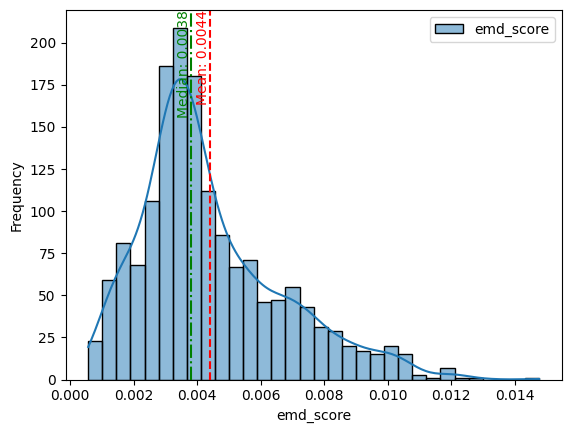

In [24]:
sns.histplot(for_plot2, kde=True)

# Calculate mean and median
mean_value = np.mean(for_plot2['emd_score'])
median_value = np.median(for_plot2['emd_score'])

# Add vertical lines for mean and median
plt.axvline(mean_value, color='r', linestyle='--', label=f'Mean: {mean_value:.2f}')
plt.axvline(median_value, color='g', linestyle='-.', label=f'Median: {median_value:.2f}')

# Add text labels for mean and median
plt.text(mean_value, plt.gca().get_ylim()[1], f'Mean: {mean_value:.4f}', 
         rotation=90, va='top', ha='right', color='r')
plt.text(median_value, plt.gca().get_ylim()[1], f'Median: {median_value:.4f}', 
         rotation=90, va='top', ha='right', color='g')

plt.xlabel('emd_score')  
plt.ylabel('Frequency')   
plt.show()

## The below is to find the minimum EMD score for each sequence, plus any within 0.0009 of it 
#### (this is the difference where AtSAL1 measurably becomes different - check the AtSAL1 data)
#### Other EMD scores are replaced with NaN
#### Add localisation data and determine if it matches columns that are not NaN
#### Create a new column showing match or not

In [25]:
temp_df = sub_df.loc[sub_df['ref_protein']== 'AtSAL1_updated-pH_7_9']
temp_df = temp_df[['seq_id', 'pH2', 'emd_score', 'clade', 'taxa']]

reshaped_df = temp_df.pivot_table(values='emd_score', 
                            index='seq_id', 
                            columns='pH2', 
                            aggfunc='first')

test_df = temp_df[['seq_id', 'clade', 'taxa']]

reshaped_df = pd.merge(reshaped_df, test_df, on='seq_id', how='left').drop_duplicates(subset='seq_id')

reshaped_df[-10:]


,seq_id,7_0,7_3,7_6,7_9,8_2,clade,taxa
2475,99172,0.007679,0.004145,0.004145,0.004145,0.004145,AHLb,Eudicots/Caryophyllales
2480,99371,0.003749,0.003749,0.003749,0.003749,0.001180,SAL,Eudicots/Asterids
2485,99789,0.007419,0.007419,0.003012,0.003012,0.003012,AHLa,Eudicots/Asterids
2490,99841,0.010985,0.006483,0.006483,0.006483,0.006483,Basal_AHL,Monilophytes
2495,99844,0.008091,0.008091,0.004073,0.004073,0.003900,Basal_AHL,Mosses
2500,AtAHL,0.002736,0.002736,0.002736,0.002736,0.003619,AHLa,Eudicots/Rosids
2505,AtSAL1,0.004041,0.004041,0.004041,0.003105,0.003105,SAL,Eudicots/Rosids
2510,AtSAL2,0.005270,0.005270,0.005270,0.002358,0.003847,SAL,Eudicots/Rosids
2515,AtSAL3,0.012906,0.008984,0.008984,0.006559,0.003110,SAL,Eudicots/Rosids
2520,AtSAL4,0.003481,0.002151,0.002151,0.002151,0.002151,SAL,Eudicots/Rosids


# IMPORTANT - I need to think of running this again but rather than picking the best one/s of each row relative to themselves, do it with an absolute value.
### I need to think on this more

## I need to get the electrostatic maps of the AtSAL1 crystal structure and determine the threshold from those
## * There is a difference in the question I'm answering if I take a relative threshold (which pH is closest to AtSAL1), and an absolute value (which might be able to complement AtSAL1). If I want to ask which pH's are they functional at I need to isolate the electric charge at the Mg2+ binding site... And THEN I can compare to localisation

## * Before I do all this I need to sort out my code and make sure I know what I'm doing and can keep a track of it

In [26]:
# List of continuous columns
cont_cols = ['7_0', '7_3', '7_6', '7_9', '8_2']

# Function to process each row
def process_row(row, threshold):
    min_val = row[cont_cols].min()
    mask = (row[cont_cols] <= min_val + threshold) & (row[cont_cols] >= min_val)
    row[cont_cols] = np.where(mask, row[cont_cols], np.nan)
    return row

# Set the threshold (the float value you want to add to the minimum)
threshold = 0.0009  # Adjust this value as needed

# Apply the function to each row
reshaped_df = reshaped_df.apply(lambda row: process_row(row, threshold), axis=1)

# Display the result
reshaped_df[-10:]

,seq_id,7_0,7_3,7_6,7_9,8_2,clade,taxa
2475,99172,NaN,0.004145,0.004145,0.004145,0.004145,AHLb,Eudicots/Caryophyllales
2480,99371,NaN,NaN,NaN,NaN,0.001180,SAL,Eudicots/Asterids
2485,99789,NaN,NaN,0.003012,0.003012,0.003012,AHLa,Eudicots/Asterids
2490,99841,NaN,0.006483,0.006483,0.006483,0.006483,Basal_AHL,Monilophytes
2495,99844,NaN,NaN,0.004073,0.004073,0.003900,Basal_AHL,Mosses
2500,AtAHL,0.002736,0.002736,0.002736,0.002736,0.003619,AHLa,Eudicots/Rosids
2505,AtSAL1,NaN,NaN,NaN,0.003105,0.003105,SAL,Eudicots/Rosids
2510,AtSAL2,NaN,NaN,NaN,0.002358,NaN,SAL,Eudicots/Rosids
2515,AtSAL3,NaN,NaN,NaN,NaN,0.003110,SAL,Eudicots/Rosids
2520,AtSAL4,NaN,0.002151,0.002151,0.002151,0.002151,SAL,Eudicots/Rosids


In [27]:
# Add localisation

In [28]:
loc_df1 = pd.read_csv('/home/mattm/projects/np_paper_structural/DeepLoc2_results.csv')
loc_df2 = pd.read_csv('/home/mattm/projects/np_paper_structural/20240709 - MitoFates_mod.csv')

loc_df1 = loc_df1[['Protein_ID', 'Localizations']]
loc_df1.columns = ['seq_id', 'localisations']

loc_df2.drop_duplicates(subset='seq_id', inplace=True)

# merge the Deeploc2 and MitoFates localisation prediction dataframes
loc_df = pd.merge(loc_df1, loc_df2, on='seq_id', how='inner')

# merge the Deeploc2 and MitoFates localisation prediction columns
loc_df['localisation'] = loc_df['localisations'].astype(str) + loc_df['mito'].apply(lambda x: f'|{x}' if pd.notna(x) and x != '' else '')

loc_df = loc_df[['seq_id', 'localisation']]

In [29]:
threshold_df = reshaped_df.merge(loc_df, on='seq_id', how='left')
threshold_df

,seq_id,7_0,7_3,7_6,7_9,8_2,clade,taxa,localisation
0,10029,NaN,NaN,0.001930,0.001930,0.001930,CNP,Liverworts,Cytoplasm
1,10086,0.003430,0.003430,0.003430,0.003430,0.003430,AHLb,Eudicots/Caryophyllales,Cytoplasm|Nucleus
2,10276,NaN,NaN,NaN,NaN,0.002398,CNP,Eudicots/Caryophyllales,Plastid
3,10748,NaN,NaN,0.003989,0.003989,0.003989,AHLb,Eudicots/Rosids,Plastid
4,10972,NaN,0.005432,0.005432,0.005432,0.005432,CNP,Eudicots/Asterids,Plastid|Mitochondria
...,...,...,...,...,...,...,...,...,...
500,AtAHL,0.002736,0.002736,0.002736,0.002736,0.003619,AHLa,Eudicots/Rosids,Cytoplasm|Nucleus
501,AtSAL1,NaN,NaN,NaN,0.003105,0.003105,SAL,Eudicots/Rosids,Plastid|Mitochondria
502,AtSAL2,NaN,NaN,NaN,0.002358,NaN,SAL,Eudicots/Rosids,Cytoplasm|Nucleus
503,AtSAL3,NaN,NaN,NaN,NaN,0.003110,SAL,Eudicots/Rosids,Cytoplasm|Nucleus


In [30]:
threshold_df.columns

Index(['seq_id', '7_0', '7_3', '7_6', '7_9', '8_2', 'clade', 'taxa',
       'localisation'],
      dtype='object')

## The version below is not AHL specific, but has had 'Guard cell cytoplasm' added

In [31]:
def process_cellular_locations(df):
    """
    Add columns for cellular locations and determine Yes/No based on localization and prediction values.
    Includes special handling for guard cell cytoplasm and plastid pH-dependent locations.
    Uses specific pH values for plastid localizations: 7.0-7.3 for dark, 7.9-8.2 for light.
    Args:
        df: DataFrame containing 'localisation' column and prediction columns
    Returns:
        DataFrame with added location and accuracy columns
    """
    # Dictionary mapping locations to their corresponding prediction columns
    loc_dict = {
        'Cytoplasm': ['7_0', '7_3'],
        'Nucleus': ['7_0', '7_3'],
        'Plastid stroma/lumen dark': ['7_0', '7_3'],
        'Plastid lumen light': ['7_9', '8_2'],
        'Mitochondria': ['7_9', '8_2'], # This is for the mitochondrial matrix
        'Peroxisome': ['8_2']
    }

    def check_location(row, location):
        # Special handling for Guard cell cytoplasm
        if location == 'Guard cell cytoplasm':
            if not pd.isna(row['localisation']) and 'Cytoplasm' in row['localisation'].split('|'):
                return 'Yes' if row['7_6'] != '0' and not pd.isna(row['7_6']) else 'No'
            return pd.NA

        # Special handling for Plastid locations
        if location in ['Plastid stroma/lumen dark', 'Plastid lumen light']:
            if not pd.isna(row['localisation']) and 'Plastid' in row['localisation'].split('|'):
                # Get the relevant pH columns for this location
                columns_to_check = loc_dict[location]
                
                # Check if any values in the relevant pH range are non-zero
                has_valid_ph = any(row[col] != '0' and not pd.isna(row[col]) for col in columns_to_check)
                
                if has_valid_ph:
                    return 'Yes'
                return 'No'
            return pd.NA

        # Regular location handling
        if pd.isna(row['localisation']) or location not in row['localisation'].split('|'):
            return pd.NA

        # Check if any corresponding prediction columns have valid values
        columns_to_check = loc_dict[location]
        if any(row[col] != '0' and not pd.isna(row[col]) for col in columns_to_check):
            return 'Yes'
        return 'No'

    # Add a column for each location, including Guard cell cytoplasm
    all_locations = list(loc_dict.keys()) + ['Guard cell cytoplasm']
    for location in all_locations:
        df[location] = df.apply(lambda row: check_location(row, location), axis=1)

    def determine_accuracy(row):
        # Get all location values, excluding NaN
        location_cols = ['Cytoplasm', 'Guard cell cytoplasm', 'Nucleus', 'Plastid stroma/lumen dark', 'Plastid lumen light', 'Mitochondria', 'Peroxisome']
        values = [row[col] for col in location_cols if not pd.isna(row[col])]
        
        # If no non-NaN values, return NaN
        if not values:
            return pd.NA
        
        has_yes = 'Yes' in values
        has_no = 'No' in values
        
        if has_yes and has_no:
            return 'Partial'
        elif has_yes and not has_no:
            return 'Yes'
        else: # has_no and not has_yes
            return 'No'

    # Add accuracy column
    df['accuracy'] = df.apply(determine_accuracy, axis=1)
    
    return df

threshold_df = process_cellular_locations(threshold_df)
threshold_df[-10:]

,seq_id,7_0,7_3,7_6,7_9,8_2,clade,taxa,localisation,Cytoplasm,Nucleus,Plastid stroma/lumen dark,Plastid lumen light,Mitochondria,Peroxisome,Guard cell cytoplasm,accuracy
495,99172,NaN,0.004145,0.004145,0.004145,0.004145,AHLb,Eudicots/Caryophyllales,Cytoplasm|Nucleus,Yes,Yes,<NA>,<NA>,<NA>,<NA>,Yes,Yes
496,99371,NaN,NaN,NaN,NaN,0.001180,SAL,Eudicots/Asterids,Plastid|Mitochondria,<NA>,<NA>,No,Yes,Yes,<NA>,<NA>,Partial
497,99789,NaN,NaN,0.003012,0.003012,0.003012,AHLa,Eudicots/Asterids,Cytoplasm|Nucleus|Peroxisome,No,No,<NA>,<NA>,<NA>,Yes,Yes,Partial
498,99841,NaN,0.006483,0.006483,0.006483,0.006483,Basal_AHL,Monilophytes,Cytoplasm|Nucleus|Peroxisome,Yes,Yes,<NA>,<NA>,<NA>,Yes,Yes,Yes
499,99844,NaN,NaN,0.004073,0.004073,0.003900,Basal_AHL,Mosses,Plastid,<NA>,<NA>,No,Yes,<NA>,<NA>,<NA>,Partial
500,AtAHL,0.002736,0.002736,0.002736,0.002736,0.003619,AHLa,Eudicots/Rosids,Cytoplasm|Nucleus,Yes,Yes,<NA>,<NA>,<NA>,<NA>,Yes,Yes
501,AtSAL1,NaN,NaN,NaN,0.003105,0.003105,SAL,Eudicots/Rosids,Plastid|Mitochondria,<NA>,<NA>,No,Yes,Yes,<NA>,<NA>,Partial
502,AtSAL2,NaN,NaN,NaN,0.002358,NaN,SAL,Eudicots/Rosids,Cytoplasm|Nucleus,No,No,<NA>,<NA>,<NA>,<NA>,No,No
503,AtSAL3,NaN,NaN,NaN,NaN,0.003110,SAL,Eudicots/Rosids,Cytoplasm|Nucleus,No,No,<NA>,<NA>,<NA>,<NA>,No,No
504,AtSAL4,NaN,0.002151,0.002151,0.002151,0.002151,SAL,Eudicots/Rosids,Peroxisome,<NA>,<NA>,<NA>,<NA>,<NA>,Yes,<NA>,Yes


In [26]:
# threshold_df = threshold_df[['seq_id', 'clade', 'taxa', 'localisation', 'Cytoplasm', 'Nucleus', 'Plastid', 'Mitochondria', 'Peroxisome', 'accuracy']]
threshold_df.to_csv('localisation-pH_accuracy_full_data.csv')

### Find all cytoplasmically localised sequences to check their transit peptides

In [ ]:
threshold_df = pd.read_csv('localisation-pH_accuracy_full_data.csv')
seq_lst = threshold_df.loc[threshold_df['Cytoplasm'] == 'No']['seq_id'].to_list()

['10029',
 '12096',
 '13688',
 '13876',
 '14577',
 '15209',
 '15682',
 '15743',
 '16199',
 '17105',
 '17823',
 '17937',
 '18248',
 '18311',
 '18357',
 '18872',
 '19111',
 '19266',
 '19421',
 '19472',
 '19576',
 '20262',
 '20947',
 '21163',
 '21419',
 '21743',
 '21764',
 '21968',
 '22302',
 '23667',
 '23732',
 '24002',
 '25695',
 '26466',
 '26614',
 '27406',
 '27937',
 '29175',
 '29495',
 '29668',
 '31117',
 '31151',
 '31433',
 '31442',
 '31625',
 '31679',
 '32117',
 '32744',
 '33448',
 '33450',
 '33555',
 '34824',
 '34845',
 '35467',
 '35642',
 '36524',
 '37055',
 '37245',
 '37580',
 '38327',
 '38555',
 '39662',
 '40121',
 '40831',
 '40892',
 '41475',
 '41592',
 '42326',
 '43082',
 '43335',
 '44350',
 '45385',
 '45831',
 '46276',
 '46469',
 '47032',
 '47586',
 '48080',
 '48335',
 '49849',
 '50775',
 '50987',
 '51398',
 '51898',
 '52894',
 '53249',
 '54197',
 '54419',
 '54625',
 '55536',
 '55808',
 '56253',
 '56456',
 '56570',
 '57005',
 '57187',
 '58274',
 '58688',
 '59090',
 '59618',


In [ ]:
import pandas as pd
import plotly.express as px
import plotly.graph_objects as go 
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from itertools import combinations

# Constants for visualization
TAXA_ORDER = [
    'Chromista', 'Rhodophyta', 'Glaucophyta', 'Chlorophyta', 'Streptophyte_algae',
    'Hornworts', 'Liverworts', 'Mosses', 'Lycophytes', 'Monilophytes', 'Ferns', 
    'Cycadales', 'Ginkgoales', 'Gnetales', 'Gymnos', 'Gymnosperms', 'Pinales',
    'ANAGrade', 'Magnoliids', 'Monocots', 'Monocots/Alismatales', 'Monocots/Diosales',
    'Monocots/Pandanales', 'Monocots/Liliales', 'Monocots/Asparagales', 
    'Monocots/Commelinids', 'Eudicots/Ranunculales', 'Eudicots', 
    'Eudicots/Caryophyllales', 'Eudicots/Asterids', 'Eudicots/Santalales',
    'Eudicots/Saxifragales', 'Eudicots/Rosids'
]

COMPARTMENTS = [
    'Cytoplasm', 'Guard cell cytoplasm', 'Nucleus', 'Plastid stroma/lumen dark', 
    'Plastid lumen light', 'Mitochondria', 'Peroxisome'
]

COMPARTMENT_ABBREV = {
    'Cytoplasm': 'C', 
    'Nucleus': 'N', 
    'Plastid': 'P', 
    'Mitochondria': 'M', 
    'Peroxisome': 'Px'
}

AHL_COLORS = {
    'AHLa': '#2a788e',
    'AHLb': '#22a884',
    'Basal_AHL': '#414487',
    'Algal_AHL': '#7ad151'
}

# Set global plotting style
plt.style.use("seaborn-v0_8-whitegrid")
sns.set_context("notebook", font_scale=1.2)

def create_subplot_grid(n_clades, max_cols=3):
    """
    Creates a subplot grid based on number of clades.
    
    Args:
        n_clades: Number of clades to display
        max_cols: Maximum number of columns in grid
    
    Returns:
        tuple: (figure, axes, n_rows, n_cols)
    """
    n_cols = min(max_cols, n_clades)
    n_rows = (n_clades + n_cols - 1) // n_cols
    
    fig = plt.figure(figsize=(24, 7*n_rows))
    gs = fig.add_gridspec(n_rows, n_cols, hspace=0.8, wspace=0.8)
    axes = gs.subplots()
    
    # Reshape axes for consistent indexing
    if n_rows == 1:
        axes = axes.reshape(1, -1)
    elif n_cols == 1:
        axes = axes.reshape(-1, 1)
        
    return fig, axes, n_rows, n_cols

def filter_taxa_by_samples(df, clade, min_samples):
    """
    Filters taxa based on minimum sample count requirement.
    
    Args:
        df: Input DataFrame
        clade: Clade to filter
        min_samples: Minimum number of samples required
    
    Returns:
        tuple: (filtered DataFrame, valid taxa)
    """
    clade_df = df[df['clade'] == clade]
    taxa_counts = clade_df['taxa'].value_counts()
    valid_taxa = taxa_counts[taxa_counts >= min_samples].index
    return clade_df[clade_df['taxa'].isin(valid_taxa)], valid_taxa

def create_small_multiples(df, min_samples=0):
    """
    Creates small multiple heatmaps showing localization patterns for each clade,
    aggregated by taxa, with improved layout and custom taxa order.
    Only includes taxa with sample counts >= min_samples.
    Displays sample counts in each cell.
    
    Args:
        df: Input DataFrame
        min_samples: Minimum number of samples required for a taxon to be included
    """
    clades = df['clade'].unique()
    fig, axes, n_rows, n_cols = create_subplot_grid(len(clades))
    
    for idx, clade in enumerate(clades):
        row, col = idx // n_cols, idx % n_cols
        clade_df, valid_taxa = filter_taxa_by_samples(df, clade, min_samples)
        
        if len(valid_taxa) == 0:
            axes[row, col].text(0.5, 0.5, f'No taxa in {clade} have ≥{min_samples} samples',
                              ha='center', va='center')
            axes[row, col].axis('off')
            continue
            
        # Get ordered taxa present in this clade
        ordered_taxa = [taxa for taxa in TAXA_ORDER if taxa in valid_taxa]
        
        # Calculate proportions and counts
        taxa_proportions = []
        taxa_counts_matrix = []
        
        for compartment in COMPARTMENTS:
            compartment_proportions = []
            compartment_counts = []
            
            for taxon in ordered_taxa:
                taxon_data = clade_df[clade_df['taxa'] == taxon][compartment]
                yes_count = (taxon_data == 'Yes').sum()
                no_count = (taxon_data == 'No').sum()
                total = yes_count + no_count
                
                proportion = (yes_count - no_count) / total if total > 0 else 0
                compartment_proportions.append(proportion)
                compartment_counts.append(total)
            
            taxa_proportions.append(compartment_proportions)
            taxa_counts_matrix.append(compartment_counts)
        
        # Create labels with sample counts
        taxa_labels = [
            f'{taxon} (n={len(clade_df[clade_df["taxa"] == taxon])})'
            for taxon in ordered_taxa
        ]
        
        # Create and format heatmap
        heatmap_data = np.array(taxa_proportions)
        create_annotated_heatmap(
            axes[row, col],
            heatmap_data,
            taxa_counts_matrix,
            COMPARTMENTS,
            taxa_labels,
            f'Clade: {clade}'
        )
    
    # Remove empty subplots
    remove_empty_subplots(fig, axes, len(clades), n_rows, n_cols)
    
    # Add title and adjust layout
    fig.suptitle(
        'Proportion of sequences in a particular taxa at a particular pH that have a predicted localisation that would likely complement AtSAL1 activity',
        fontsize=16,
        fontweight='bold',
        y=1.02
    )
    plt.tight_layout()
    return fig

def create_annotated_heatmap(ax, heatmap_data, count_matrix, row_labels, col_labels, title):
    """
    Creates an annotated heatmap with counts in cells.
    
    Args:
        ax: Matplotlib axis
        heatmap_data: Data for heatmap colors
        count_matrix: Matrix of counts to display
        row_labels: Labels for rows
        col_labels: Labels for columns
        title: Title for heatmap
    """
    sns.heatmap(
        heatmap_data,
        cmap='PRGn',
        vmin=-1,
        vmax=1,
        center=0,
        yticklabels=row_labels,
        xticklabels=col_labels,
        ax=ax,
        cbar_kws={'label': 'Proportion pH-localisation match/mismatch'},
        linewidths=0.5,
        linecolor='white'
    )
    
    # Add count annotations
    for i in range(len(row_labels)):
        for j in range(len(col_labels)):
            value = heatmap_data[i, j]
            text_color = 'white' if abs(value) > 0.5 else 'black'
            ax.text(
                j + 0.5,
                i + 0.5,
                str(count_matrix[i][j]),
                ha='center',
                va='center',
                color=text_color,
                fontsize=10
            )
    
    # Format axis
    format_heatmap_axis(ax, title)

def format_heatmap_axis(ax, title):
    """
    Formats the appearance of a heatmap axis.
    
    Args:
        ax: Matplotlib axis to format
        title: Title for the axis
    """
    ax.set_title(title, pad=20, fontsize=14, fontweight='bold')
    ax.set_xlabel('Taxa', labelpad=15)
    ax.set_ylabel('Subcellular Compartments', labelpad=15)
    
    ax.set_xticklabels(
        ax.get_xticklabels(),
        rotation=45,
        horizontalalignment='right',
        fontsize=14
    )
    
    ax.set_yticklabels(
        ax.get_yticklabels(),
        fontsize=13
    )
    
    ax.grid(False)

def remove_empty_subplots(fig, axes, n_plots, n_rows, n_cols):
    """
    Removes empty subplots from the figure.
    
    Args:
        fig: Matplotlib figure
        axes: Array of axes
        n_plots: Number of actual plots
        n_rows: Number of rows in grid
        n_cols: Number of columns in grid
    """
    if n_rows * n_cols > n_plots:
        for idx in range(n_plots, n_rows * n_cols):
            fig.delaxes(axes[idx // n_cols, idx % n_cols])

def pH_heatmap(df, min_samples=0):
    """
    Creates small multiple heatmaps showing the proportion of non-NaN values
    for each combination of taxa and pH level within each clade.
    Only includes taxa with sample counts >= min_samples.
    Displays total sample count in each cell.
    
    Args:
        df: Input DataFrame
        min_samples: Minimum number of samples required for a taxon to be included
    """
    clades = df['clade'].unique()
    pH_levels = ['7_0', '7_3', '7_6', '7_9', '8_2']
    pH_labels = [ph.replace('_', '.') for ph in pH_levels]
    
    fig, axes, n_rows, n_cols = create_subplot_grid(len(clades))
    
    for idx, clade in enumerate(clades):
        row, col = idx // n_cols, idx % n_cols
        clade_df, valid_taxa = filter_taxa_by_samples(df, clade, min_samples)
        
        if len(valid_taxa) == 0:
            axes[row, col].text(0.5, 0.5, f'No taxa in {clade} have ≥{min_samples} samples',
                              ha='center', va='center')
            axes[row, col].axis('off')
            continue
        
        # Get ordered taxa and create matrices
        ordered_taxa = [taxa for taxa in TAXA_ORDER if taxa in valid_taxa]
        heatmap_data = np.zeros((len(pH_levels), len(ordered_taxa)))
        count_matrix = np.zeros((len(pH_levels), len(ordered_taxa)), dtype=int)
        
        # Calculate proportions and counts
        for i, pH in enumerate(pH_levels):
            for j, taxon in enumerate(ordered_taxa):
                taxon_data = clade_df[clade_df['taxa'] == taxon]
                total_rows = len(taxon_data)
                if total_rows > 0:
                    non_nan_count = taxon_data[pH].notna().sum()
                    heatmap_data[i, j] = non_nan_count / total_rows
                    count_matrix[i, j] = non_nan_count
        
        # Create labels and heatmap
        taxa_labels = [f'{taxon} (n={len(clade_df[clade_df["taxa"] == taxon])})' 
                      for taxon in ordered_taxa]
        
        create_ph_heatmap(
            axes[row, col],
            heatmap_data,
            count_matrix,
            pH_labels,
            taxa_labels,
            f'Clade: {clade}'
        )
    
    # Remove empty subplots and add title
    remove_empty_subplots(fig, axes, len(clades), n_rows, n_cols)
    fig.suptitle(
        'Proportion of sequences in a particular taxa that have a value at a particular pH, likely to complement AtSAL1',
        fontsize=16,
        fontweight='bold',
        y=1.02
    )
    
    plt.tight_layout()
    return fig

def create_ph_heatmap(ax, heatmap_data, count_matrix, row_labels, col_labels, title):
    """
    Creates a pH-specific heatmap with annotations.
    
    Args:
        ax: Matplotlib axis
        heatmap_data: Data for heatmap colors
        count_matrix: Matrix of counts to display
        row_labels: Labels for rows
        col_labels: Labels for columns
        title: Title for heatmap
    """
    sns.heatmap(
        heatmap_data,
        cmap='YlOrRd',
        vmin=0,
        vmax=1,
        yticklabels=row_labels,
        xticklabels=col_labels,
        ax=ax,
        cbar_kws={'label': 'Proportion of complementing sequences'},
        linewidths=0.5,
        linecolor='white'
    )
    
    # Add count annotations
    for i in range(len(row_labels)):
        for j in range(len(col_labels)):
            value = heatmap_data[i, j]
            text_color = 'white' if value > 0.7 else 'black'
            ax.text(
                j + 0.5,
                i + 0.5,
                str(count_matrix[i, j]),
                ha='center',
                va='center',
                color=text_color,
                fontsize=10
            )
    
    # Format axis
    format_heatmap_axis(ax, title)

def create_upset_plot(df):
    """
    Creates an UpSet-style plot with statistical analysis including:
    - Compartment percentages per clade
    - Jaccard similarity indices between clades
    Shows both matching and mismatching predictions side by side
    """
    import itertools
    import matplotlib.pyplot as plt
    import numpy as np
    import pandas as pd
    
    compartments = ['Cytoplasm', 'Nucleus', 'Plastid', 'Mitochondria', 'Peroxisome']
    compartment_abbrev = {'Cytoplasm': 'C', 'Nucleus': 'N', 'Plastid': 'P', 
                         'Mitochondria': 'M', 'Peroxisome': 'Px'}
    
    # Separate dataframes for each group
    df_cnp = df[df['clade'] == 'CNP']
    df_sal = df[df['clade'] == 'SAL']
    df_ahl = df[df['clade'].isin(['AHLa', 'AHLb', 'Basal_AHL', 'Algal_AHL'])]
    
    # Colors for AHL clades
    ahl_colors = {
        'AHLa': '#2a788e',
        'AHLb': '#22a884',
        'Basal_AHL': '#414487',
        'Algal_AHL': '#7ad151'
    }
    
    # Initialize max_bar_height as a list to allow modification inside nested functions
    max_bar_height = [0]
    
    def calculate_compartment_percentages(sub_df):
        total_proteins = len(sub_df)
        percentages = {}
        for comp in compartments:
            count = len(sub_df[sub_df[comp] == 'Yes'])
            percentages[comp] = (count / total_proteins) * 100
        return percentages
    
    def calculate_jaccard_similarity(df1, df2):
        def get_combinations(df):
            combinations = set()
            for _, row in df.iterrows():
                current = frozenset(comp for comp in compartments 
                                  if pd.notna(row[comp]) and row[comp] == 'Yes')
                if current:
                    combinations.add(current)
            return combinations
        
        set1 = get_combinations(df1)
        set2 = get_combinations(df2)
        intersection = len(set1.intersection(set2))
        union = len(set1.union(set2))
        return intersection / union if union > 0 else 0
    
    def get_combinations_and_counts(sub_df, data_type='Yes'):
        all_combinations = []
        counts = {}
        clade_counts = {}
        
        for _, row in sub_df.iterrows():
            current_locations = set()
            valid_row = False
            for comp in compartments:
                if pd.notna(row[comp]) and row[comp] == data_type:
                    current_locations.add(comp)
                    valid_row = True
            
            if valid_row:
                current_set = frozenset(current_locations)
                counts[current_set] = counts.get(current_set, 0) + 1
                if current_set not in all_combinations:
                    all_combinations.append(current_set)
                    clade_counts[current_set] = {clade: 0 for clade in sub_df['clade'].unique()}
                clade_counts[current_set][row['clade']] += 1
        
        all_combinations.sort(key=lambda x: counts[x], reverse=True)
        return all_combinations, counts, clade_counts
    
    # Create figure with modified gridspec
    fig = plt.figure(figsize=(15, 28))  # Doubled width to accommodate side-by-side plots
    
    # Create a gridspec with 4 rows - one for each plot plus stats
    gs = fig.add_gridspec(4, 1, height_ratios=[2, 2, 2, 2], hspace=0.4)
    
    # Create nested gridspecs for each plot section
    gs_plots = [gs[i].subgridspec(1, 2, width_ratios=[1, 1], wspace=0.3) for i in range(3)]
    
    def create_subplot_pair(data, gs_section, title):
        for data_type, subplot_gs in zip(['Yes', 'No'], [gs_section[0], gs_section[1]]):
            combinations, counts, clade_counts = get_combinations_and_counts(data, data_type)
            n_combinations = len(combinations)
            
            if n_combinations == 0:
                continue
            
            nested_gs = subplot_gs.subgridspec(2, 1, height_ratios=[1.5, 1], hspace=0.05)
            
            bar_width = 0.8
            
            ax_sets = fig.add_subplot(nested_gs[0])
            
            x_positions = np.arange(n_combinations)
            
            if title in ['CNP', 'SAL']:
                color = '#440154' if title == 'CNP' else '#fde725'
                heights = [counts[comb] for comb in combinations]
                ax_sets.bar(x_positions, heights, color=color, width=bar_width)
                max_bar_height[0] = max(max_bar_height[0], max(heights) if heights else 0)
            else:
                bottom = np.zeros(n_combinations)
                total_heights = np.zeros(n_combinations)
                for clade in sorted(data['clade'].unique()):
                    heights = [clade_counts[comb][clade] for comb in combinations]
                    ax_sets.bar(x_positions, heights, bottom=bottom, 
                            label=clade, color=ahl_colors[clade], width=bar_width)
                    bottom += heights
                    total_heights += heights
                
                max_bar_height[0] = max(max_bar_height[0], max(total_heights) if len(total_heights) > 0 else 0)
            
            if data_type == 'Yes':
                plot_title = f'{title} Prediction matching pH'
            else:
                plot_title = f'{title} Prediction mismatched to pH'
            
            ax_sets.grid(True, axis='y', linestyle='--', alpha=0.7)
            ax_sets.set_xticks([])
            ax_sets.set_ylabel('Number of Proteins')
            ax_sets.set_xlim(-0.6, n_combinations - 0.4)
            ax_sets.set_title(plot_title)
            
            if title == 'AHL Clades':
                ax_sets.legend(bbox_to_anchor=(1.3, 1), loc='upper left')
            
            ax_matrix = fig.add_subplot(nested_gs[1])
            
            matrix_data = np.zeros((len(compartments), n_combinations))
            for i, comp in enumerate(compartments):
                for j, comb in enumerate(combinations):
                    matrix_data[i, j] = 1 if comp in comb else 0
            
            for i in range(len(compartments)):
                for j in range(n_combinations):
                    if matrix_data[i, j]:
                        rect = plt.Rectangle((j - bar_width/2, i-0.4), bar_width, 0.8,
                                        facecolor='black')
                        ax_matrix.add_patch(rect)
            
            ax_matrix.set_xlim(-0.6, n_combinations - 0.4)
            ax_matrix.set_ylim(-0.5, len(compartments) - 0.5)
            ax_matrix.set_yticks(np.arange(len(compartments)))
            ax_matrix.set_yticklabels(compartments)
            
            ax_matrix.set_xticks(x_positions)
            combination_labels = ['+'.join(sorted(compartment_abbrev[comp] for comp in comb)) 
                                for comb in combinations]
            ax_matrix.set_xticklabels(combination_labels, rotation=45, ha='right')
            
            ax_matrix.grid(True, which='major', linestyle='-', alpha=0.3)
    
    # Create subplots in desired order: SAL, AHL, CNP
    create_subplot_pair(df_sal, gs_plots[0], 'SAL')
    create_subplot_pair(df_ahl, gs_plots[1], 'AHL Clades')
    create_subplot_pair(df_cnp, gs_plots[2], 'CNP')
    
    # Set all bar plots to the same y-axis limit
    for ax in fig.get_axes():
        if ax.get_ylabel() == 'Number of Proteins':
            ax.set_ylim(0, max_bar_height[0] * 1.1)  # Add 10% padding
    
    # Create statistics subplot in the bottom row
    stats_ax = fig.add_subplot(gs[3])
    stats_ax.axis('off')
    
    y_position = 0.95
    
    stats_ax.text(0.02, y_position, 'Compartment Percentages by Clade:', 
                 fontsize=12, fontweight='bold')
    
    y_position -= 0.1
    for group_df, name in [(df_cnp, 'CNP'), (df_sal, 'SAL')]:
        percentages = calculate_compartment_percentages(group_df)
        stats_text = f"{name}: " + ", ".join(
            f"{comp}: {percentages[comp]:.1f}%" for comp in compartments)
        stats_ax.text(0.02, y_position, stats_text)
        y_position -= 0.05
    
    for clade in ['AHLa', 'AHLb', 'Basal_AHL', 'Algal_AHL']:
        clade_df = df[df['clade'] == clade]
        percentages = calculate_compartment_percentages(clade_df)
        stats_text = f"{clade}: " + ", ".join(
            f"{comp}: {percentages[comp]:.1f}%" for comp in compartments)
        stats_ax.text(0.02, y_position, stats_text)
        y_position -= 0.05
    
    y_position -= 0.1
    stats_ax.text(0.02, y_position, 
                 "Jaccard Similarity Indices (measures pattern similarity between clades):",
                 fontsize=12, fontweight='bold')
    y_position -= 0.05
    stats_ax.text(0.02, y_position, 
                 "(0 = completely different patterns, 1 = identical patterns)")
    
    clades = ['CNP', 'SAL', 'AHLa', 'AHLb', 'Basal_AHL', 'Algal_AHL']
    for clade1, clade2 in itertools.combinations(clades, 2):
        y_position -= 0.05
        df1 = df[df['clade'] == clade1]
        df2 = df[df['clade'] == clade2]
        jaccard = calculate_jaccard_similarity(df1, df2)
        stats_ax.text(0.02, y_position, 
                     f"{clade1} vs {clade2}: {jaccard:.3f}")
    
    legend_text = "Legend: " + ", ".join(f"{compartment_abbrev[comp]}={comp}" for comp in compartments)
    fig.text(0.1, 0.01, legend_text, fontsize=8)
    
    plt.subplots_adjust(bottom=0.15, right=0.85, left=0.15)
    
    return fig

def visualize_protein_localizations(df, min_samples=0):
    """
    Creates all visualizations for the protein localization data
    """
 
    print("\nCreating complementation plot...")
    pH_multiples = pH_heatmap(df, min_samples=min_samples)
    pH_multiples.show()       
    print('This plot shows what proportion of sequences in a particular taxa have a value at a particular pH')
    
    # Create small multiples
    print("\nCreating pH-localisation plot...")
    small_multiples = create_small_multiples(df, min_samples=min_samples)
    small_multiples.show()
    print('This plot shows what proportion of sequences in a particular taxa at a particular pH have a predicted localisation that would likely complement AtSAL1 activity')

    
    # Create upset plot
    print("\nCreating upset plot...")
    upset_plot = create_upset_plot(df)
    upset_plot.show()


Creating complementation plot...


/tmp/ipykernel_519890/2938748931.py:315: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


This plot shows what proportion of sequences in a particular taxa have a value at a particular pH

Creating pH-localisation plot...
This plot shows what proportion of sequences in a particular taxa at a particular pH have a predicted localisation that would likely complement AtSAL1 activity

Creating upset plot...


/tmp/ipykernel_519890/2938748931.py:163: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


KeyError: 'Plastid'

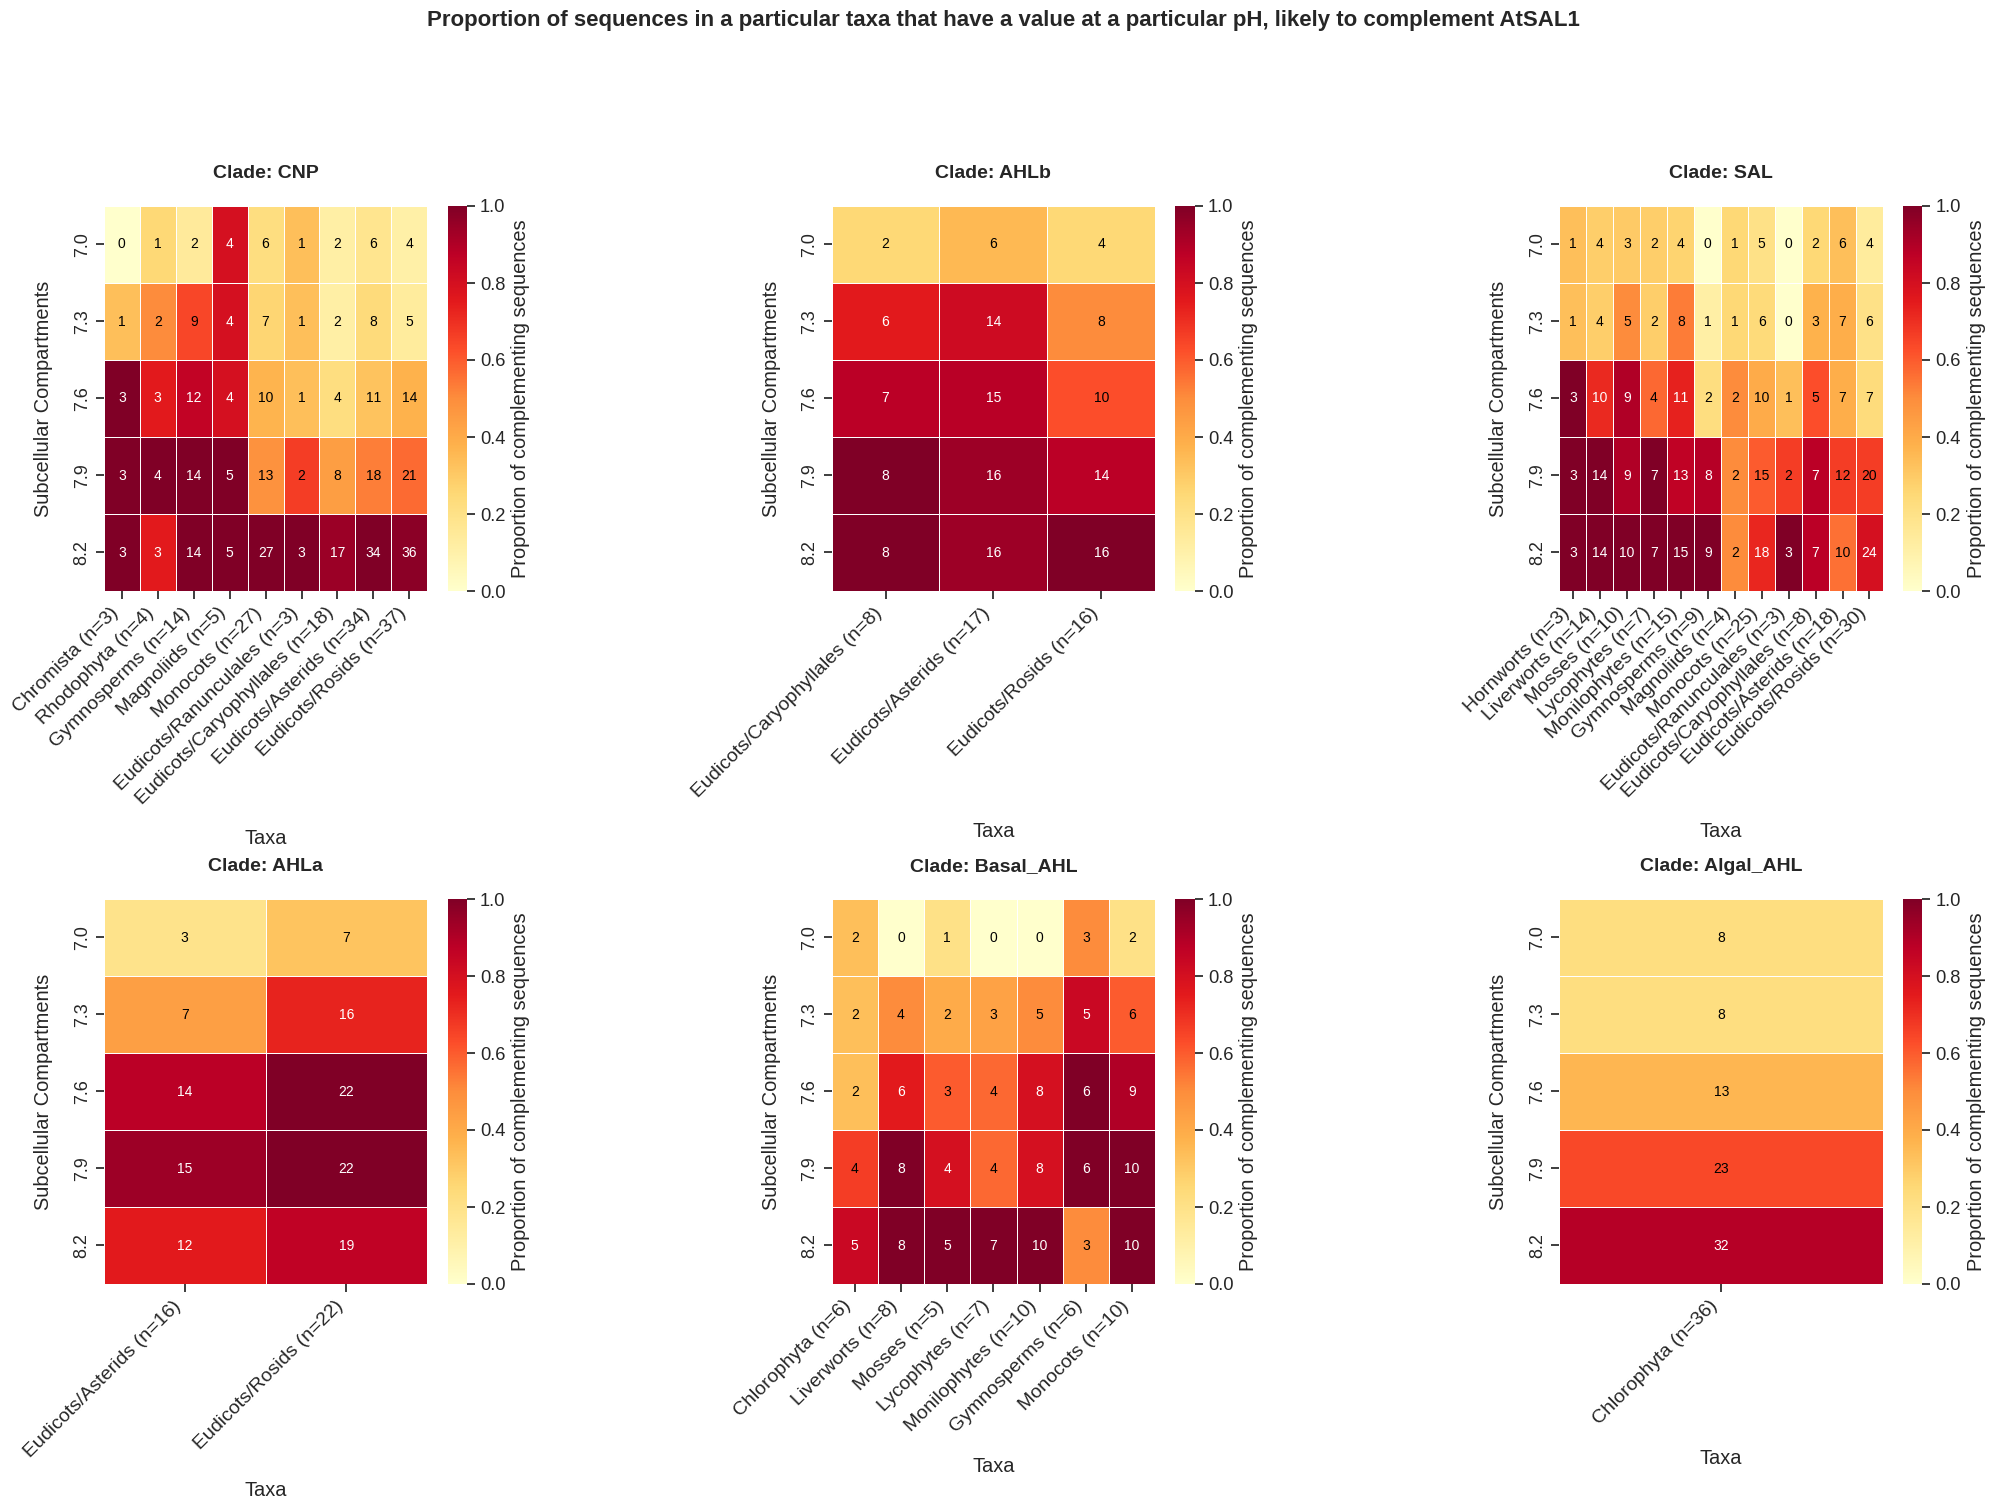

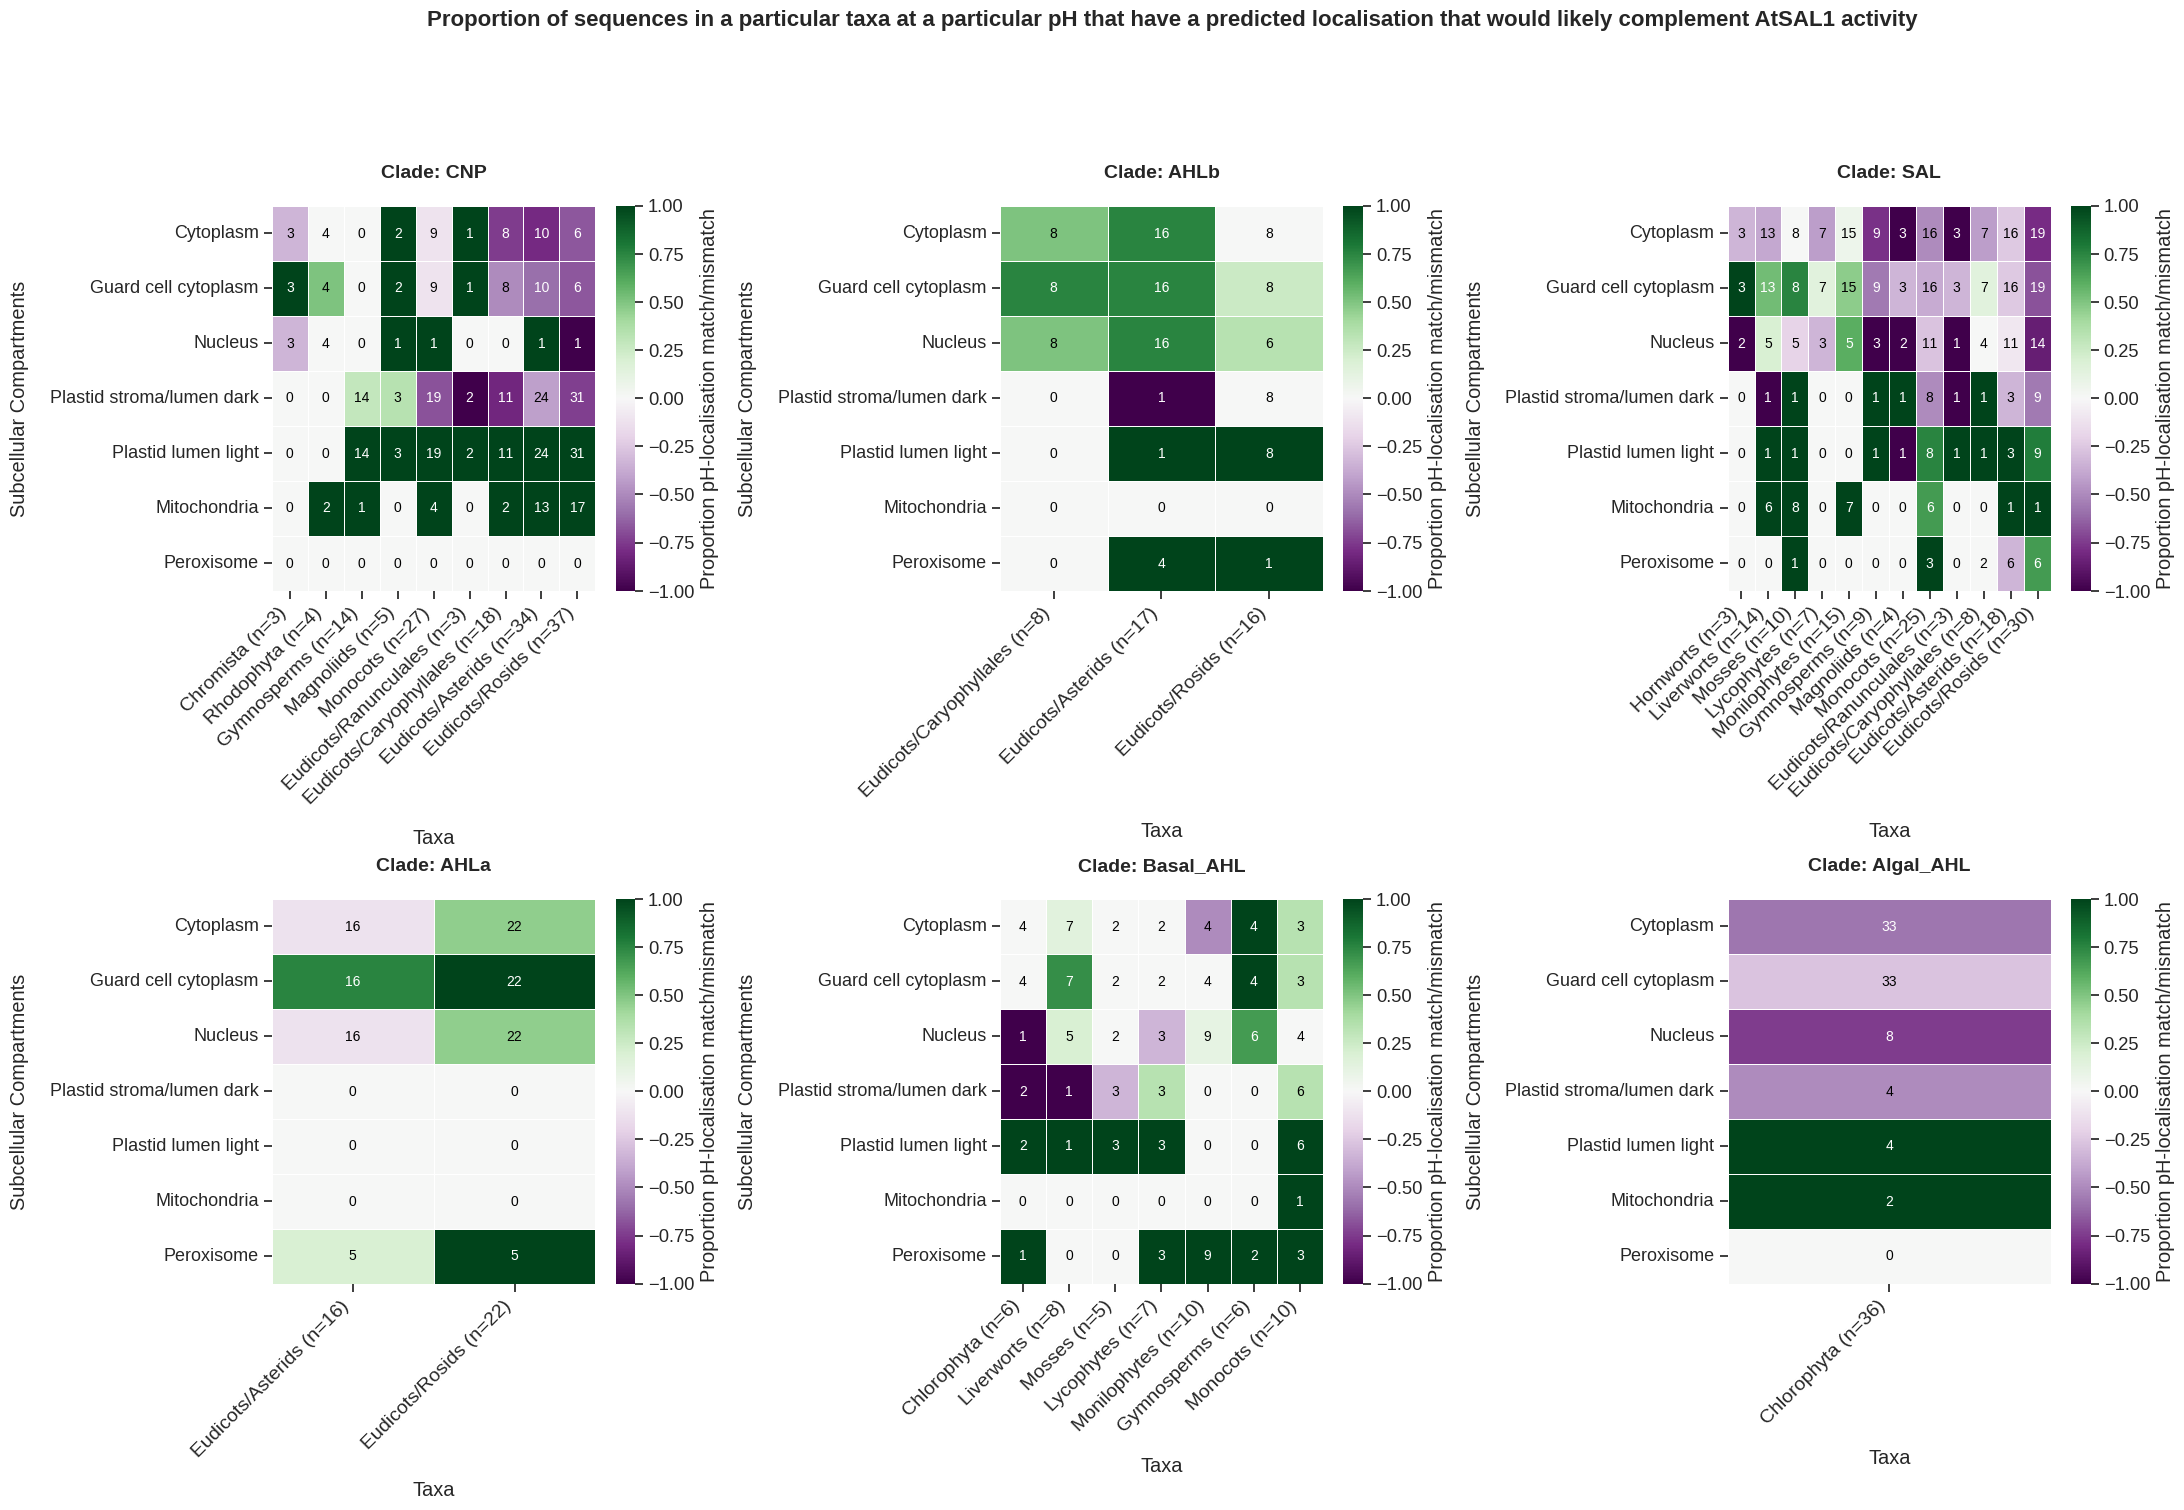

<Figure size 1500x2800 with 0 Axes>

In [28]:
visualize_protein_localizations(threshold_df, min_samples=3)

# Generate list of sequences where I need to manually determine the transcription start to check for signal peptides
### These may have been left out during automatic annotation

In [32]:
species_df = wrk_index[['Unid', 'Species']]
species_df.columns = ['seq_id', 'species']

threshold_df = threshold_df.loc[(threshold_df['Cytoplasm'] == 'No') | (threshold_df['Nucleus'] == 'No') | (threshold_df['Mitochondria'] == 'No')]

seq_df = pd.merge(threshold_df, species_df, how='left', on='seq_id')
seq_df

,seq_id,7_0,7_3,7_6,7_9,8_2,clade,taxa,localisation,Cytoplasm,Nucleus,Plastid stroma/lumen dark,Plastid lumen light,Mitochondria,Peroxisome,Guard cell cytoplasm,accuracy,species
0,10029,NaN,NaN,0.001930,0.001930,0.001930,CNP,Liverworts,Cytoplasm,No,<NA>,<NA>,<NA>,<NA>,<NA>,Yes,Partial,Marchantia_paleacea
1,12096,NaN,NaN,NaN,NaN,0.000886,SAL,Magnoliids,Cytoplasm|Nucleus,No,No,<NA>,<NA>,<NA>,<NA>,No,No,Gyrocarpus_americanus
2,13688,NaN,NaN,NaN,NaN,0.003214,Basal_AHL,Monilophytes,Cytoplasm|Nucleus|Peroxisome,No,No,<NA>,<NA>,<NA>,Yes,No,Partial,Osmunda_sp.
3,13876,NaN,NaN,NaN,NaN,0.002817,CNP,Eudicots/Rosids,Cytoplasm|Nucleus,No,No,<NA>,<NA>,<NA>,<NA>,No,No,Cucumis_sativus
4,14577,NaN,NaN,NaN,0.003488,0.003349,AHLb,Eudicots/Caryophyllales,Cytoplasm|Nucleus,No,No,<NA>,<NA>,<NA>,<NA>,No,No,Phytolacca_americana
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
202,98862,NaN,NaN,NaN,0.002086,0.002086,SAL,Liverworts,Cytoplasm|Mitochondria,No,<NA>,<NA>,<NA>,Yes,<NA>,No,Partial,Barbilophozia_barbata
203,98974,NaN,NaN,NaN,0.001115,0.001115,SAL,Eudicots/Rosids,Cytoplasm,No,<NA>,<NA>,<NA>,<NA>,<NA>,No,No,Linum_hirsutum
204,99789,NaN,NaN,0.003012,0.003012,0.003012,AHLa,Eudicots/Asterids,Cytoplasm|Nucleus|Peroxisome,No,No,<NA>,<NA>,<NA>,Yes,Yes,Partial,Cornus_florida
205,AtSAL2,NaN,NaN,NaN,0.002358,NaN,SAL,Eudicots/Rosids,Cytoplasm|Nucleus,No,No,<NA>,<NA>,<NA>,<NA>,No,No,Arabidopsis_thaliana


In [94]:
seq_df = seq_df.loc[~seq_df['seq_id'].isin(['AtSAL2', 'AtSAL3'])]
seq_lst = seq_df['seq_id'].to_list()

wrk_index2 = wrk_index.loc[wrk_index['Unid'].isin(seq_lst)]

wrk_index2 = wrk_index2[['PACid', 'Unid', 'Species', 'Datasource',
       'Header', 'Sequence', 'Onekp_index_id', 'Scaffold', 'Subject Seq-id']]

In [96]:
phyto_check_list = wrk_index2.loc[~wrk_index2['PACid'].isna()]
onekp_check_list = wrk_index2.loc[wrk_index2['PACid'].isna()]
print(len(phyto_check_list))
print(len(onekp_check_list))

phyto_check_list.to_csv('phyto_seqs_check_SP.csv', index=False)
onekp_check_list.to_csv('onekp_seqs_check_SP.csv', index=False)

19
186


# Add photosynthesis pathway (if known) to taxa dataframe

In [171]:
photosynthesis_pathway = pd.read_csv('/home/mattm/projects/np_paper_structural/photosynthesis_pathway_data.csv', delimiter='\t',  encoding='latin1')
photosynthesis_pathway = photosynthesis_pathway[['SpeciesName', 'AccSpeciesID', 'TraitName', 'DataID', 'DataName', 'OriglName', 'OrigValueStr']]

/tmp/ipykernel_509669/3075361560.py:1: DtypeWarning: Columns (15,16,18,19,21,26,27) have mixed types. Specify dtype option on import or set low_memory=False.
  photosynthesis_pathway = pd.read_csv('/home/mattm/projects/np_paper_structural/photosynthesis_pathway_data.csv', delimiter='\t',  encoding='latin1')


In [172]:
import pandas as pd
import numpy as np

def clean_pathway(value):
    if pd.isna(value) or not isinstance(value, str):
        return []
    
    # Convert to uppercase for consistent processing
    value = value.upper()
    
    # Remove trailing periods and clean up
    value = value.replace('.', '').replace('?', '').replace('-', '/').strip()
    
    # Split on common delimiters
    pathways = [p.strip() for p in value.split('/')]
    
    # Keep only valid pathways
    valid_pathways = {'C3', 'C4', 'CAM'}
    clean_pathways = [p for p in pathways if p in valid_pathways]
    
    return clean_pathways if clean_pathways else []

# Apply the cleaning function
photosynthesis_pathway['clean_pathways'] = photosynthesis_pathway['OrigValueStr'].apply(clean_pathway)

# Keep only rows where clean_pathways is not empty
photosynthesis_pathway_clean = photosynthesis_pathway[photosynthesis_pathway['clean_pathways'].str.len() > 0]

# Filter duplicate species by DataID column

# First, create a boolean mask for rows with DataID 8461
is_preferred = photosynthesis_pathway_clean['DataID'] == 8461

# Sort by this boolean mask (False comes before True) and drop duplicates
# keeping the last occurrence (which will be the one with DataID 8461 if it exists)
photosynthesis_pathway_clean = (photosynthesis_pathway_clean
              .assign(preferred=is_preferred)
              .sort_values('preferred')
              .drop_duplicates(subset='SpeciesName', keep='last')
              .drop(columns='preferred'))

temp_df = photosynthesis_pathway_clean[['SpeciesName', 'clean_pathways']]
temp_df.columns = ['Species', 'Photosynthesis_pathway']
taxa = pd.merge(taxa, temp_df, how='left', on='Species')

def update_c3_pathways(taxa):
    """
    Updates the 'Photosynthetic_pathway' column to 'C3' for taxa known to exclusively use C3 photosynthesis
    
    Parameters:
    taxa_df (pandas.DataFrame): DataFrame with 'taxa' and 'Photosynthetic_pathway' columns
    
    Returns:
    pandas.DataFrame: Updated DataFrame with modified photosynthetic pathway values
    """
    # List of taxa known to exclusively use C3 photosynthesis
    c3_only_taxa = [
        'ANAGrade',
        'Glaucophyta',
        'Gymnosperms',
        'Hornworts',
        'Liverworts',
        'Lycophytes',
        'Mosses',
        'Rhodophyta'
    ]
    
    # Update Photosynthetic_pathway to 'C3' where taxa matches the c3_only list
    taxa.loc[taxa['taxa'].isin(c3_only_taxa), 'Photosynthesis_pathway'] = 'C3'
    
    return taxa

# Archive

In [173]:
from typing import Dict, List, Optional, Tuple, Callable, Union, Any
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.pipeline import Pipeline
import umap
from dataclasses import dataclass
import pandas as pd
from functools import partial

# Configuration constants
FIGURE_SIZE = (14, 10)
SCATTER_ALPHA = 0.7
EDGE_WIDTH = 0.5
MARKER_SIZE = 10

def normalize_pathways(pathways: Union[str, List[str]]) -> Tuple[str, ...]:
    """
    Converts pathway input to a normalized tuple format.
    """
    if isinstance(pathways, str):
        return (pathways,)
    return tuple(sorted(pathways))

def create_pathway_marker_mapping() -> Dict[Tuple[str, ...], str]:
    """
    Creates an immutable mapping for all possible combinations of photosynthesis pathways.
    """
    return {
        ('C3',): 'o',      # circle
        ('C4',): 'X',      # x
        ('CAM',): 'H',     # hexagon
        ('C3', 'C4'): '^',   # triangle up
        ('C3', 'CAM'): 'v',  # triangle down
        ('C4', 'CAM'): 's',  # square
        ('C3', 'C4', 'CAM'): '*'  # star
    }

def get_marker_for_pathways(
    pathways: Union[str, List[str]], 
    marker_mapping: Dict[Tuple[str, ...], str],
    default_marker: str = 'o'
) -> str:
    """
    Get the marker style for given pathways.
    """
    normalized = normalize_pathways(pathways)
    return marker_mapping.get(normalized, default_marker)

@dataclass
class PlotConfig:
    color_column: str
    title: str
    ordered: bool = False
    order: Optional[List[str]] = None
    marker_column: Optional[str] = None
    marker_mapping: Optional[Dict[str, str]] = None
    
    def get_marker_for_value(self, value: Union[str, List[str]]) -> str:
        """Get marker for a value, handling both single values and lists."""
        if self.marker_column == 'Photosynthesis_pathway':
            return get_marker_for_pathways(value, create_pathway_marker_mapping())
        return self.marker_mapping.get(value, 'o') if self.marker_mapping else 'o'

def create_color_mapping(values: List[str], ordered: bool = False) -> Dict[str, str]:
    """Create a color dictionary mapping values to hex color codes."""
    colormap = plt.cm.inferno if ordered else plt.cm.viridis
    colors = colormap(np.linspace(0, 1, len(values)))
    # Convert RGBA arrays to hex strings
    hex_colors = [mcolors.rgb2hex(color[:3]) for color in colors]
    if ordered:
        return dict(zip(values, hex_colors))
    return dict(zip(sorted(values), hex_colors))

def create_umap_transform(n_neighbors: int, min_dist: float, n_components: int) -> Pipeline:
    """Create a UMAP transformation pipeline."""
    preprocessor = ColumnTransformer(
        transformers=[
            ('num', StandardScaler(), ['emd_score']),
            ('cat_clade', OneHotEncoder(drop='first', sparse_output=False), ['clade'])
        ])
    
    return Pipeline([
        ('preprocessor', preprocessor),
        ('umap', umap.UMAP(
            n_neighbors=n_neighbors,
            min_dist=min_dist,
            n_components=n_components,
            random_state=42
        ))
    ])

def setup_plot(n_components: int) -> Tuple[plt.Figure, plt.Axes]:
    """Set up the plot with correct dimensionality."""
    fig = plt.figure(figsize=FIGURE_SIZE)
    ax = fig.add_subplot(111, projection='3d' if n_components == 3 else None)
    return fig, ax

def add_scatter_points(
    ax: plt.Axes,
    points: np.ndarray,
    mask: np.ndarray,
    color: str,
    marker: str = 'o',
    label: Optional[str] = None
) -> None:
    """Add scatter points to the plot."""
    if points.shape[1] == 3:
        ax.scatter(
            points[mask, 0], points[mask, 1], points[mask, 2],
            c=color, marker=marker, label=label,
            alpha=SCATTER_ALPHA, edgecolors='black', linewidth=EDGE_WIDTH
        )
    else:
        ax.scatter(
            points[mask, 0], points[mask, 1],
            c=color, marker=marker, label=label,
            alpha=SCATTER_ALPHA, edgecolors='black', linewidth=EDGE_WIDTH
        )

def create_legend_element(marker: str, color: str, label: str) -> plt.Line2D:
    """Create a legend element with specified properties."""
    return plt.Line2D(
        [0], [0], 
        marker=marker, 
        color='w' if color != 'grey' else 'grey',
        label=label, 
        markerfacecolor=color, 
        markersize=MARKER_SIZE,
        markeredgecolor='black'
    )

def add_legends(
    ax: plt.Axes,
    color_mapping: Dict[str, str],
    color_title: str,
    marker_mapping: Optional[Dict[str, str]] = None
) -> None:
    """Add legends to the plot."""
    color_elements = [
        create_legend_element('o', color, value)
        for value, color in color_mapping.items()
    ]
    color_legend = ax.legend(
        handles=color_elements,
        title=color_title,
        loc='upper left',
        bbox_to_anchor=(1.1, 1)
    )
    ax.add_artist(color_legend)

    if marker_mapping:
        marker_elements = [
            create_legend_element(marker, 'grey', value)
            for value, marker in marker_mapping.items()
        ]
        ax.legend(
            handles=marker_elements,
            title='Markers',
            loc='upper left',
            bbox_to_anchor=(1.1, 0.6)
        )

def get_unique_pathways(series: pd.Series) -> set:
    """
    Get unique pathway combinations from a series containing either lists of strings or NaN.
    
    Args:
        series: Pandas series containing lists of pathways or NaN
    Returns:
        Set of tuples containing unique pathway combinations
    """
    unique_combinations = set()
    for pathways in series:
        if pd.isna(pathways):
            unique_combinations.add(('Unknown',))  # or however you want to handle NaN
        else:
            unique_combinations.add(tuple(sorted(pathways)))
    return unique_combinations

def plot_umap(
    umap_result: np.ndarray,
    data: pd.DataFrame,
    config: PlotConfig
) -> None:
    """Create UMAP visualization with specified configuration."""
    if umap_result.shape[1] not in [2, 3]:
        raise ValueError("UMAP result must have 2 or 3 components")

    fig, ax = setup_plot(umap_result.shape[1])
    
    unique_values = (
        config.order if config.order is not None
        else sorted(data[config.color_column].unique())
    )
    
    color_mapping = create_color_mapping(unique_values, config.ordered)
    
    if config.marker_column:
        if config.marker_column == 'Photosynthesis_pathway':
            # Get unique pathway combinations
            pathway_combinations = get_unique_pathways(data[config.marker_column])
            marker_mapping = create_pathway_marker_mapping()
            
            for value in unique_values:
                for pathways in pathway_combinations:
                    # Create mask for this color value and pathway combination
                    if pathways == ('Unknown',):
                        mask = (data[config.color_column] == value) & \
                               data[config.marker_column].isna()
                    else:
                        mask = (data[config.color_column] == value) & \
                               data[config.marker_column].apply(
                                   lambda x: tuple(sorted(x)) == pathways if not pd.isna(x) else False
                               )
                    
                    if mask.any():
                        marker = marker_mapping.get(pathways, 'p')
                        add_scatter_points(
                            ax, umap_result, mask,
                            color_mapping[value],
                            marker
                        )
            
            # Create legend mapping for pathways
            legend_marker_mapping = {
                '/'.join(combo) if combo != ('Unknown',) else 'Unknown': marker_mapping.get(combo, 'd')
                for combo in pathway_combinations
            }
            
        else:
            # Original behavior for other marker columns
            marker_values = data[config.marker_column].unique()
            for value in unique_values:
                for marker_val in marker_values:
                    mask = (data[config.color_column] == value) & \
                          (data[config.marker_column] == marker_val)
                    if mask.any():
                        marker = config.marker_mapping.get(marker_val, 'X')
                        add_scatter_points(
                            ax, umap_result, mask,
                            color_mapping[value],
                            marker
                        )
            legend_marker_mapping = config.marker_mapping
    else:
        for value in unique_values:
            mask = data[config.color_column] == value
            if mask.any():
                add_scatter_points(
                    ax, umap_result, mask,
                    color_mapping[value],
                    label=value
                )
        legend_marker_mapping = None
    
    add_legends(ax, color_mapping, config.color_column, legend_marker_mapping)
    
    ax.set_title(f'UMAP projection of {config.title}')
    ax.set_xlabel('UMAP1')
    ax.set_ylabel('UMAP2')
    if umap_result.shape[1] == 3:
        ax.set_zlabel('UMAP3')
    
    plt.tight_layout()
    plt.show()

def create_visualizations(
    dataframe: pd.DataFrame,
    var: str,
    n_neighbors: int,
    min_dist: float,
    n_components: int
) -> None:
    """Create all UMAP visualizations for the dataset."""
    umap_pipeline = create_umap_transform(n_neighbors, min_dist, n_components)
    umap_result = umap_pipeline.fit_transform(dataframe)
    
    # Configure the different visualization types
    configs = [
        PlotConfig(
            color_column='clade',
            title=f'{var} and Clade'
        ),
        PlotConfig(
            color_column='taxa',
            title=f'{var} and Taxa',
            ordered=True,
            order=[
                'Chlorophyta', 'Streptophyte_algae', 'Hornworts', 'Liverworts',
                'Mosses', 'Lycophytes', 'Monilophytes', 'Gymnos', 'ANAGrade',
                'Magnoliids', 'Monocots', 'Eudicots', 'Eudicots/Caryophyllales',
                'Eudicots/Ranunculales', 'Eudicots/Santalales',
                'Eudicots/Saxifragales', 'Eudicots/Asterids', 'Eudicots/Rosids'
            ]
        ),
        PlotConfig(
            color_column='target_pH',
            title=f'{var} pH and Localisation',
            marker_column='localisation',
            marker_mapping={
                loc: marker for loc, marker in zip(
                    sorted(dataframe['localisation'].unique()),
                    ['o', 'H', 's', 'h', 'v', '<', 'p', '>', 'D', '*', 'X', 'x']
                )
            }
        ),
        PlotConfig(
            color_column='target_pH',
            title=f'Photosynthesis pathway pH and photosynthesis pathway',
            marker_column='Photosynthesis_pathway'
        ),
        PlotConfig(
            color_column='taxa',
            title=f'{var} and Prediction Match',
            marker_column='accuracy',
            marker_mapping={'Yes': 'o', 'No': 'X'}
        )
    ]
    
    for config in configs:
        plot_umap(umap_result, dataframe, config)

In [174]:
# 'Cytoplasm': 7.0 (guard cell 7.6)
# 'Mitochondria': 7.8
# 'Nucleus': 7.0
# 'Peroxisome': 8.4
# 'Plastid stoma light': 5.3 (?)
# 'Plastid stoma dark': 7.0
# 'Plastid lumen light': 8.1
# 'Plastid lumen dark': 7.0


# ['Cytoplasm',
#  'Cytoplasm|Mitochondria',
#  'Cytoplasm|Nucleus',
#  'Cytoplasm|Nucleus|Mitochondria',
#  'Cytoplasm|Nucleus|Peroxisome',
#  'Cytoplasm|Peroxisome',
#  'Cytoplasm|Plastid',
#  'Nucleus|Peroxisome',
#  'Nucleus|Peroxisome|Mitochondria',
#  'Peroxisome',
#  'Plastid',
#  'Plastid|Mitochondria']

In [180]:
def data_processing():
    references = ['AtSAL1_updated', '1ka1_hal2']
    pHs = ['7_6', '7_9', '8_2']
    results = {}
    threshold_df_sm =  threshold_df[['seq_id', 'accuracy']]
    
    for reference in references:
        for pH in pHs:
            all_subset_df = all_df.loc[
                (all_df['id1'] == reference) & (all_df['pH1'] == pH)
            ]
            temp_result_df = all_subset_df.loc[all_subset_df.groupby('seq_id')['emd_score'].idxmin()]
            temp_result_df = temp_result_df[['seq_id', 'pH2', 'emd_score']]
            temp_result_df.columns = ['seq_id', 'target_pH', 'emd_score']
            var_name = f'{reference}_{pH}'
            
            clades_df.columns = ('seq_id', 'clade')
            combined_result = pd.merge(temp_result_df, clades_df, on='seq_id', how='left')
            combined_result = pd.merge(combined_result, taxa, on='seq_id', how='left')
            combined_result = pd.merge(combined_result, loc_df, on='seq_id', how='left')
            combined_result = pd.merge(combined_result, threshold_df_sm, on='seq_id', how='left')
            
            results[var_name] = combined_result
            print(var_name)
    
    return results

# Usage
dataframe_results = data_processing()

AtSAL1_updated_7_6
AtSAL1_updated_7_9
AtSAL1_updated_8_2
1ka1_hal2_7_6
1ka1_hal2_7_9
1ka1_hal2_8_2


In [189]:
var = 'AtSAL1_updated_7_9'
result = dataframe_results[var]
result_temp = result

result_temp['Photosynthesis_pathway'] = result_temp['Photosynthesis_pathway'].fillna('unknown')
result_temp

,seq_id,target_pH,emd_score,clade,Species,taxa,classification,Photosynthesis_pathway,localisation,accuracy
0,10029,7_9,0.001930,CNP,Marchantia paleacea,Liverworts,Liverworts,unknown,Cytoplasm,Partial
1,10086,8_2,0.003430,AHLb,Hilleria latifolia,Eudicots/Caryophyllales,Eudicots/Caryophyllales,unknown,Cytoplasm|Nucleus,Yes
2,10276,8_2,0.002398,CNP,Amaranthus hypochondriacus,Eudicots/Caryophyllales,Eudicots/Caryophyllales,C4,Plastid,Yes
3,10748,8_2,0.003989,AHLb,Glycine max,Eudicots/Rosids,Eudicots/Rosids,C3,Plastid,Yes
4,10972,7_9,0.005432,CNP,Plantago virginica,Eudicots/Asterids,Eudicots/Asterids,unknown,Plastid|Mitochondria,Yes
...,...,...,...,...,...,...,...,...,...,...
500,AtAHL,7_6,0.002736,AHLa,Arabidopsis thaliana,Eudicots/Rosids,Eudicots/Rosids,C3,Cytoplasm|Nucleus,Yes
501,AtSAL1,8_2,0.003105,SAL,Arabidopsis thaliana,Eudicots/Rosids,Eudicots/Rosids,C3,Plastid|Mitochondria,Yes
502,AtSAL2,7_9,0.002358,SAL,Arabidopsis thaliana,Eudicots/Rosids,Eudicots/Rosids,C3,Cytoplasm|Nucleus,No
503,AtSAL3,8_2,0.003110,SAL,Arabidopsis thaliana,Eudicots/Rosids,Eudicots/Rosids,C3,Cytoplasm|Nucleus,No


In [183]:
# Print unique combinations and their frequencies
pathway_counts = result_temp['Photosynthesis_pathway'].value_counts()
print("\nPathway combinations and their counts:")
for pathways, count in pathway_counts.items():
    if pd.isna(pathways):
        print(f"NaN: {count}")
    else:
        print(f"{pathways}: {count}")

result_temp['Photosynthesis_pathway'] = result_temp['Photosynthesis_pathway'].str[0]


Pathway combinations and their counts:
['C3']: 200
['C4']: 31
['CAM']: 5


# Data: AtSAL1_updated_7_9

## Combined

/home/mattm/.local/lib/python3.10/site-packages/umap/umap_.py:1945: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(f"n_jobs value {self.n_jobs} overridden to 1 by setting random_state. Use no seed for parallelism.")


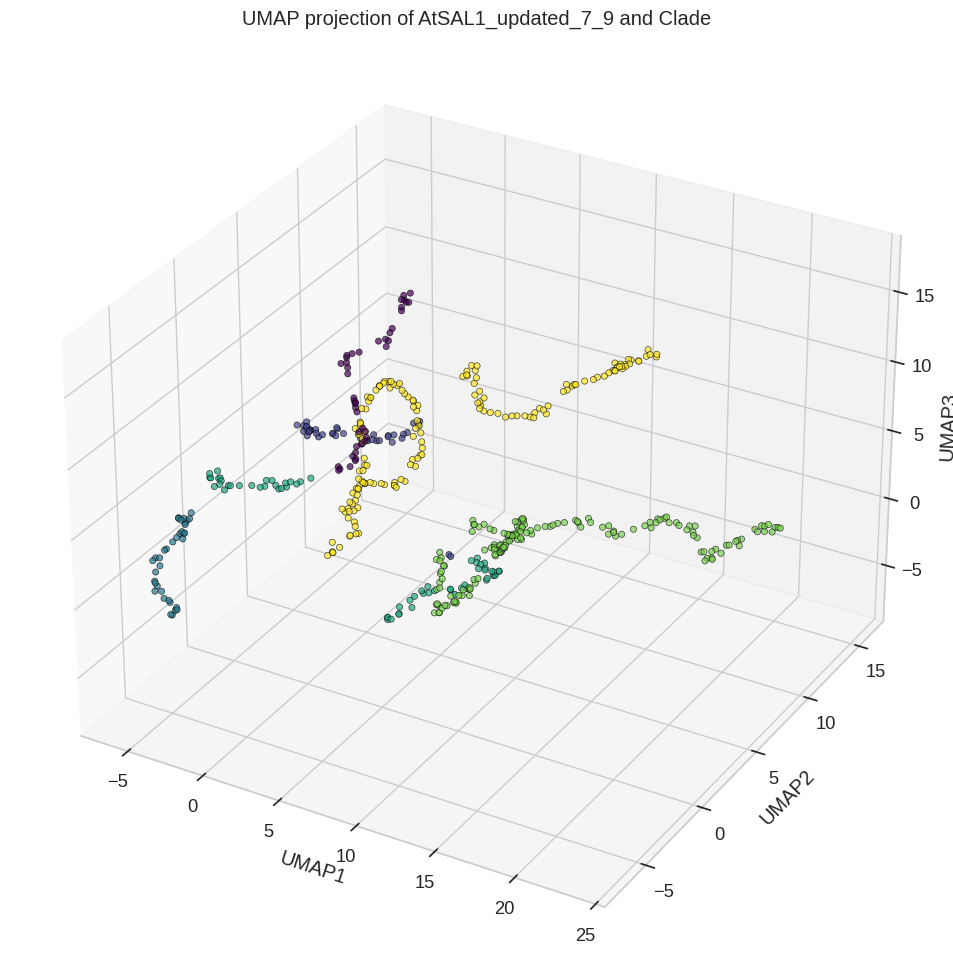

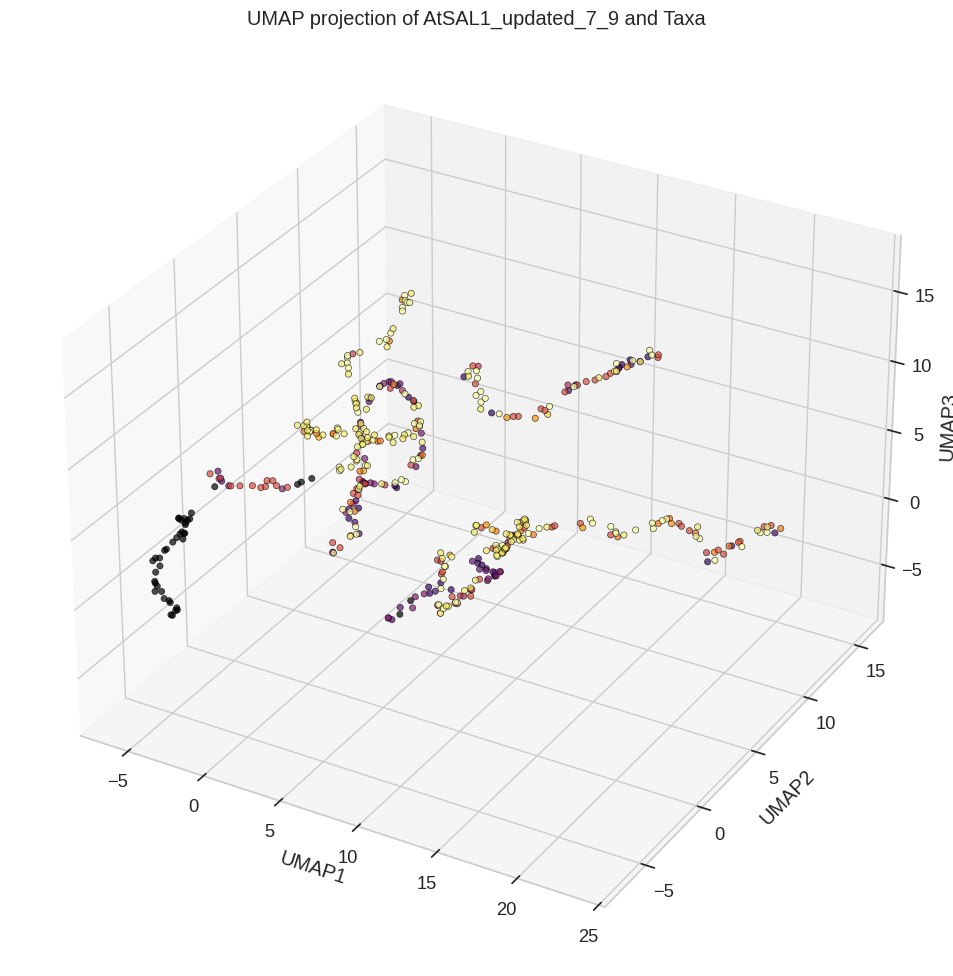

/tmp/ipykernel_509669/159859778.py:111: UserWarning: You passed a edgecolor/edgecolors ('black') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  ax.scatter(


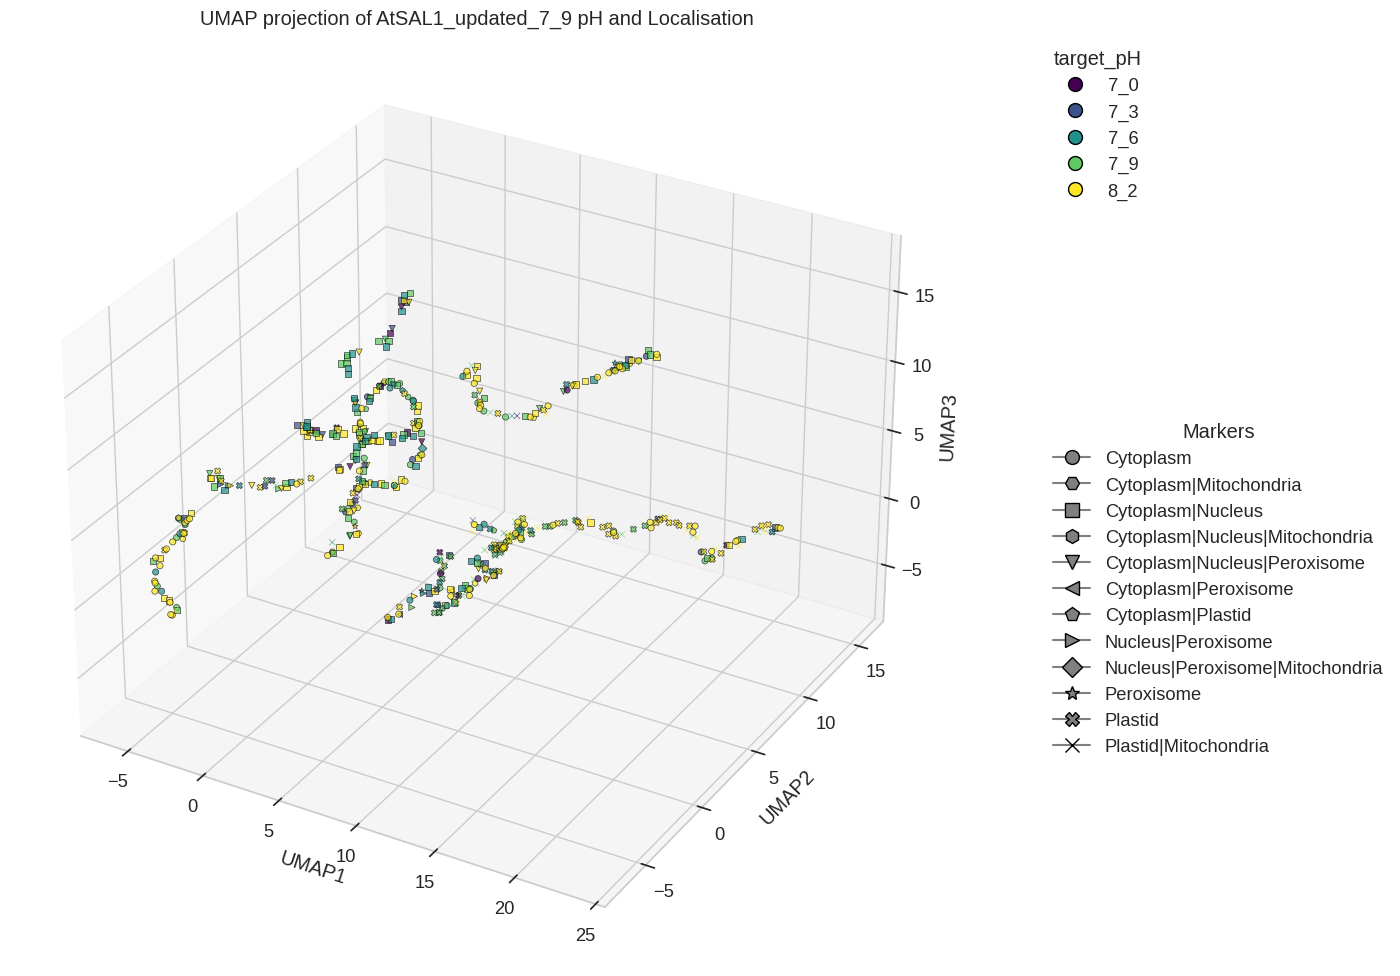

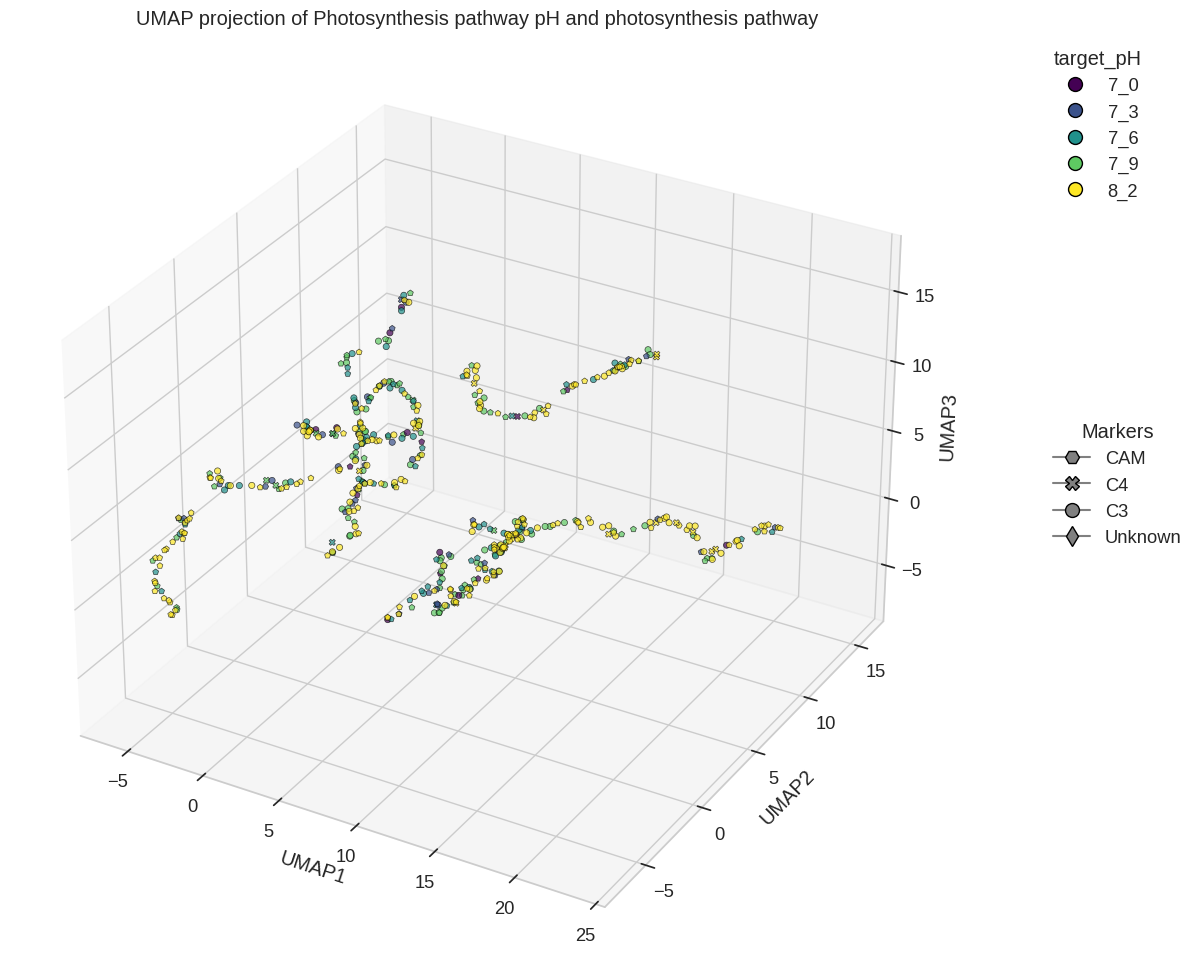

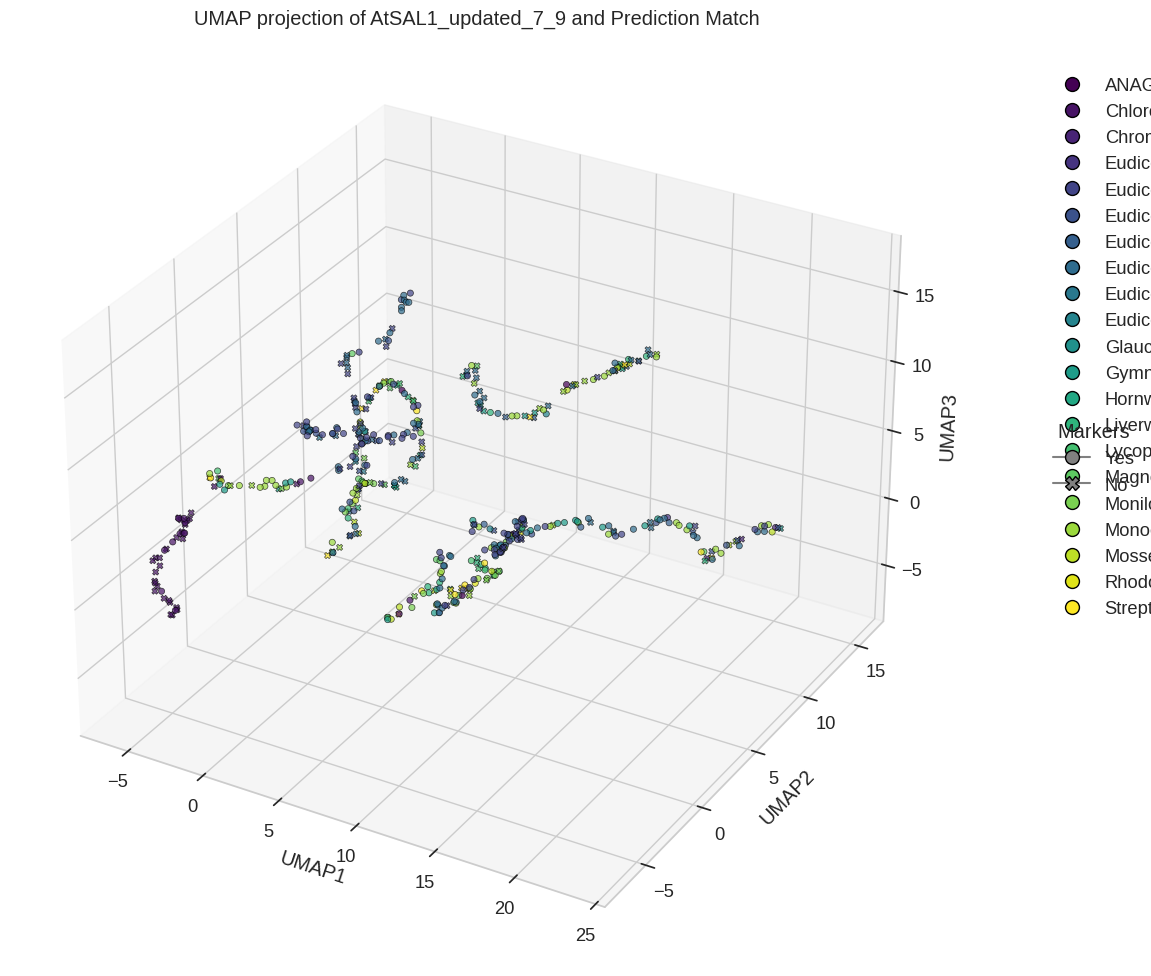

In [ ]:
var = 'AtSAL1_updated_7_9'
result = dataframe_results[var]
result_temp = result

create_visualizations(
    dataframe=result_temp,
    var='AtSAL1_updated_7_9',
    n_neighbors=8,
    min_dist=0.8,
    n_components=3  # or 3 for 3D plots
)

## SAL

In [ ]:
result_temp = result.loc[result['clade'] == 'SAL'] 

main(result_temp, var, n_neighbors=8, min_dist=0.8, n_components=2)

## CNP

In [ ]:
result_temp = result.loc[result['clade'] == 'CNP'] 

main(result_temp, var, n_neighbors=8, min_dist=0.8, n_components=2)

## AHL

In [ ]:
clades = ['AHLa', 'AHLb', 'Algal_AHL', 'Basal_AHL']
result_temp = result.loc[result['clade'].isin(clades)] 

main(result_temp, var, n_neighbors=8, min_dist=0.8, n_components=2)

## Functions

In [ ]:
def format_df(data_df, clade):

    df = data_df.loc[data_df['clade'].isin(clade)]

    # Create an explicit copy of the DataFrame
    df = df.copy()

    # Create a dictionary for renaming
    rename_dict = {
        '1ka1_hal2': 'ScHAL2',
        'AtSAL1_updated': 'AtSAL1' 
    }

    # Rename the values in the 'id1' column using .loc
    df.loc[:, 'id1'] = df['id1'].replace(rename_dict)

    # Create a new column that combines 'pH2' and 'id1' using .loc
    df.loc[:, 'pH2_id1'] = df['pH2'] + '_' + df['id1']

    # Pivot the table
    reshaped_df = df.pivot_table(values='emd_score', 
                                index='seq_id', 
                                columns='pH2_id1', 
                                aggfunc='first')

    # Reset the index to make 'id2' a regular column
    reshaped_df = reshaped_df.reset_index()

    # Optionally, fill NaN values with 0 or another placeholder
    reshaped_df = reshaped_df.fillna(0)

    # Display the first few rows of the reshaped DataFrame
    output_df = pd.merge(reshaped_df, clades_df, on='seq_id', how='left')
    output_df = pd.merge(output_df, taxa, on='seq_id', how='left')
    # print(output_df.head())

    return output_df

In [ ]:
def questions():
    def ask_question(prompt):
        while True:
            response = input(prompt + " ").lower()
            if response in ('y', 'n'):
                return response
            print(f"Invalid input: {response}. Answer must be 'y' or 'n'. Try again idiot.")

    clade_response = ask_question('Do you want to show the clades? (Y/N):')
    taxa_response = ask_question('Do you want to show the taxa? (Y/N):')
    
    print(f'clade_response: {clade_response}')
    print(f'taxa_response: {taxa_response}')
    return clade_response, taxa_response

def umap_plot(data, columns, title, clade_response, taxa_response, n_neighbors, min_dist, x_size, y_size):
    preprocessor = ColumnTransformer(
        transformers=[
            ('num', StandardScaler(), columns),
            ('cat_clade', OneHotEncoder(drop='first', sparse_output=False), ['clade'])
        ])
    
    umap_pipeline = Pipeline([
        ('preprocessor', preprocessor),
        ('umap', umap.UMAP(n_neighbors=n_neighbors, min_dist=min_dist, n_components=3, random_state=42))
    ])
    
    umap_result = umap_pipeline.fit_transform(data)
    
    figures = []
    if clade_response == 'y':
        figures.append(clade_plot(data, umap_result, title, x_size, y_size))
    if taxa_response == 'y':
        figures.append(taxa_plot(data, umap_result, title, x_size, y_size))
    
    return figures

def clade_plot(data, umap_result, title, x_size, y_size):
    unique_clades = sorted(data['clade'].unique())
    clade_colors = plt.cm.viridis(np.linspace(0, 1, len(unique_clades)))
    color_dict = dict(zip(unique_clades, clade_colors))
    
    fig = plt.figure(figsize=(x_size, y_size))
    ax = fig.add_subplot(111, projection='3d')
    
    for clade in unique_clades:
        mask = data['clade'] == clade
        ax.scatter(umap_result[mask, 0], umap_result[mask, 1], umap_result[mask, 2],
                   c=[color_dict[clade]], label=clade, alpha=0.7)
    
    ax.set_title(title)
    ax.set_xlabel('UMAP1')
    ax.set_ylabel('UMAP2')
    ax.set_zlabel('UMAP3')
    
    # Move the legend outside the plot
    ax.legend(title='Clade', bbox_to_anchor=(1.05, 1), loc='upper left')
    
    # Adjust the layout to make room for the legend
    plt.tight_layout()
    plt.subplots_adjust(right=0.8)
    
    return fig

def taxa_plot(data, umap_result, title, x_size, y_size):
    unique_taxa = [
        'Chlorophyta', 'Streptophyte_algae', 'Hornworts', 'Liverworts', 'Mosses', 'Lycophytes',
        'Monilophytes', 'Gymnos', 'ANAGrade', 'Magnoliids', 'Monocots', 'Eudicots',
        'Eudicots/Caryophyllales', 'Eudicots/Ranunculales', 'Eudicots/Santalales',
        'Eudicots/Saxifragales', 'Eudicots/Asterids', 'Eudicots/Rosids',
    ]
    taxa_colors = plt.cm.viridis(np.linspace(0, 1, len(unique_taxa)))
    color_dict = dict(zip(unique_taxa, taxa_colors))
    
    fig = plt.figure(figsize=(x_size, y_size))
    ax = fig.add_subplot(111, projection='3d')
    
    for taxa_elm in unique_taxa:
        mask = data['taxa'] == taxa_elm
        ax.scatter(umap_result[mask, 0], umap_result[mask, 1], umap_result[mask, 2],
                   c=[color_dict[taxa_elm]], label=taxa_elm, alpha=0.7)
    
    ax.set_title(title)
    ax.set_xlabel('UMAP1')
    ax.set_ylabel('UMAP2')
    ax.set_zlabel('UMAP3')
    
    # Move the legend outside the plot
    ax.legend(title='Taxa', bbox_to_anchor=(1.05, 1), loc='upper left')
    
    # Adjust the layout to make room for the legend
    plt.tight_layout()
    plt.subplots_adjust(right=0.8)
    
    return fig

def plot_data(data, columns, title, n_neighbors=5, min_dist=0.5, x_size=12, y_size=8):

    clade_response, taxa_response = questions()
    
    figures = umap_plot(data, columns, title, clade_response, taxa_response, n_neighbors, min_dist, x_size, y_size)
    
    for fig in figures:
        fig.tight_layout()
        plt.show()

# 10 Features

## SAL

In [ ]:
clades = ['SAL']

columns = ['7_0_AtSAL1', '7_0_ScHAL2', '7_3_AtSAL1', '7_3_ScHAL2',
           '7_6_AtSAL1', '7_6_ScHAL2', '7_9_AtSAL1', '7_9_ScHAL2', '8_2_AtSAL1',
           '8_2_ScHAL2']
title = 'SAL UMAP by taxa'

input_df = format_df(sub_df, clades)

plot_data(input_df, columns, title, n_neighbors=5, min_dist=0.5, x_size=12, y_size=8)

## AHL clade

In [ ]:
clades = ['AHLa', 'AHLb', 'Algal_AHL', 'Basal_AHL']

columns = ['7_0_AtSAL1', '7_0_ScHAL2', '7_3_AtSAL1', '7_3_ScHAL2',
           '7_6_AtSAL1', '7_6_ScHAL2', '7_9_AtSAL1', '7_9_ScHAL2', '8_2_AtSAL1',
           '8_2_ScHAL2']
title = 'AHL UMAP by taxa'

input_df = format_df(sub_df, clades)

plot_data(input_df, columns, title, n_neighbors=5, min_dist=0.5, x_size=12, y_size=8)

## CNP

In [ ]:
clades = ['CNP']

columns = ['7_0_AtSAL1', '7_0_ScHAL2', '7_3_AtSAL1', '7_3_ScHAL2',
           '7_6_AtSAL1', '7_6_ScHAL2', '7_9_AtSAL1', '7_9_ScHAL2', '8_2_AtSAL1',
           '8_2_ScHAL2']
title = 'SAL UMAP by taxa'

input_df = format_df(sub_df, clades)

plot_data(input_df, columns, title, n_neighbors=5, min_dist=0.5, x_size=12, y_size=8)

## Three main clades

In [ ]:
rename_dict = {
    'AHLa': 'AHL',
    'AHLb': 'AHL',
    'Algal_AHL': 'AHL',
    'Basal_AHL': 'AHL' 
}

clades = ['SAL', 'CNP', 'AHLa', 'AHLb', 'Algal_AHL', 'Basal_AHL']

columns = ['7_0_AtSAL1', '7_0_ScHAL2', '7_3_AtSAL1', '7_3_ScHAL2',
           '7_6_AtSAL1', '7_6_ScHAL2', '7_9_AtSAL1', '7_9_ScHAL2', '8_2_AtSAL1',
           '8_2_ScHAL2']
title = 'All UMAP by taxa'

input_df = format_df(sub_df, clades)

AHL_df = input_df.copy()
AHL_df.loc[:, 'clade'] = AHL_df['clade'].replace(rename_dict)

plot_data(AHL_df, columns, title, n_neighbors=5, min_dist=0.5, x_size=12, y_size=8)

## All Clades

In [ ]:
clades = ['SAL', 'CNP', 'AHLa', 'AHLb', 'Algal_AHL', 'Basal_AHL']

columns = ['7_0_AtSAL1', '7_0_ScHAL2', '7_3_AtSAL1', '7_3_ScHAL2',
           '7_6_AtSAL1', '7_6_ScHAL2', '7_9_AtSAL1', '7_9_ScHAL2', '8_2_AtSAL1',
           '8_2_ScHAL2']
title = 'All, UMAP by taxa'

input_df = format_df(sub_df, clades)

plot_data(input_df, columns, title, n_neighbors=5, min_dist=0.5, x_size=12, y_size=8)

# 5 Features - SAL data

## SAL

In [ ]:
clades = ['SAL']

columns = ['7_0_AtSAL1', '7_3_AtSAL1','7_6_AtSAL1', '7_9_AtSAL1', '8_2_AtSAL1']
title = 'SAL UMAP by taxa'

input_df = format_df(sub_df, clades)

plot_data(input_df, columns, title, n_neighbors=7, min_dist=0.5, x_size=12, y_size=8)

## AHL clade

In [ ]:
clades = ['AHLa', 'AHLb', 'Algal_AHL', 'Basal_AHL']

columns = ['7_0_AtSAL1', '7_3_AtSAL1','7_6_AtSAL1', '7_9_AtSAL1', '8_2_AtSAL1']

title = 'AHL UMAP - SAL Data'

input_df = format_df(sub_df, clades)

plot_data(input_df, columns, title, n_neighbors=8, min_dist=0.9, x_size=12, y_size=8)

## CNP

In [ ]:
clades = ['CNP']

columns = ['7_0_AtSAL1', '7_3_AtSAL1','7_6_AtSAL1', '7_9_AtSAL1', '8_2_AtSAL1']

title = 'CNP UMAP SAL Data'

input_df = format_df(sub_df, clades)

plot_data(input_df, columns, title, n_neighbors=6, min_dist=0.9, x_size=12, y_size=8)

## Three main clades

In [ ]:
rename_dict = {
    'AHLa': 'AHL',
    'AHLb': 'AHL',
    'Algal_AHL': 'AHL',
    'Basal_AHL': 'AHL' 
}

clades = ['SAL', 'CNP', 'AHLa', 'AHLb', 'Algal_AHL', 'Basal_AHL']

columns = ['7_0_AtSAL1', '7_3_AtSAL1','7_6_AtSAL1', '7_9_AtSAL1', '8_2_AtSAL1']

title = 'All UMAP by taxa'

input_df = format_df(sub_df, clades)

AHL_df = input_df.copy()
AHL_df.loc[:, 'clade'] = AHL_df['clade'].replace(rename_dict)

plot_data(AHL_df, columns, title, n_neighbors=7, min_dist=0.8, x_size=12, y_size=8)

## All Clades

In [ ]:
clades = ['SAL', 'CNP', 'AHLa', 'AHLb', 'Algal_AHL', 'Basal_AHL']

columns = ['7_0_AtSAL1', '7_3_AtSAL1','7_6_AtSAL1', '7_9_AtSAL1', '8_2_AtSAL1']

title = 'AHL UMAP by taxa'

input_df = format_df(sub_df, clades)

plot_data(input_df, columns, title, n_neighbors=5, min_dist=0.9, x_size=12, y_size=8)

## Archive

## PCA Plots


Shape of result_temp: (505, 26)

Columns in result_temp: Index(['PC1_num', 'MCA1', 'MCA2', 'MCA3', 'PC1_num', 'MCA1', 'MCA2', 'MCA3',
       'PC1_num', 'MCA1', 'MCA2', 'MCA3', 'PC1_num', 'MCA1', 'MCA2', 'MCA3',
       'seq_id', 'target_pH', 'emd_score', 'clade', 'Species', 'taxa',
       'classification', 'Photosynthesis_pathway', 'localisation', 'accuracy'],
      dtype='object')

Sample of result_temp:
    PC1_num      MCA1      MCA2      MCA3   PC1_num      MCA1      MCA2  \
0 -0.987018 -0.497053 -0.743602  0.303031 -0.987018 -0.497053 -0.743602   
1 -0.120056 -0.507309 -0.159591 -0.262392 -0.120056 -0.507309 -0.159591   
2 -0.716137  0.263027 -0.700526  0.709256 -0.716137  0.263027 -0.700526   
3  0.202926  0.977027  0.240723 -0.717382  0.202926  0.977027  0.240723   
4  1.037304 -0.347962 -0.882629  0.266564  1.037304 -0.347962 -0.882629   

       MCA3   PC1_num      MCA1  ...  seq_id  target_pH  emd_score  clade  \
0  0.303030 -0.987018 -0.497053  ...   10029        7_9   0.001

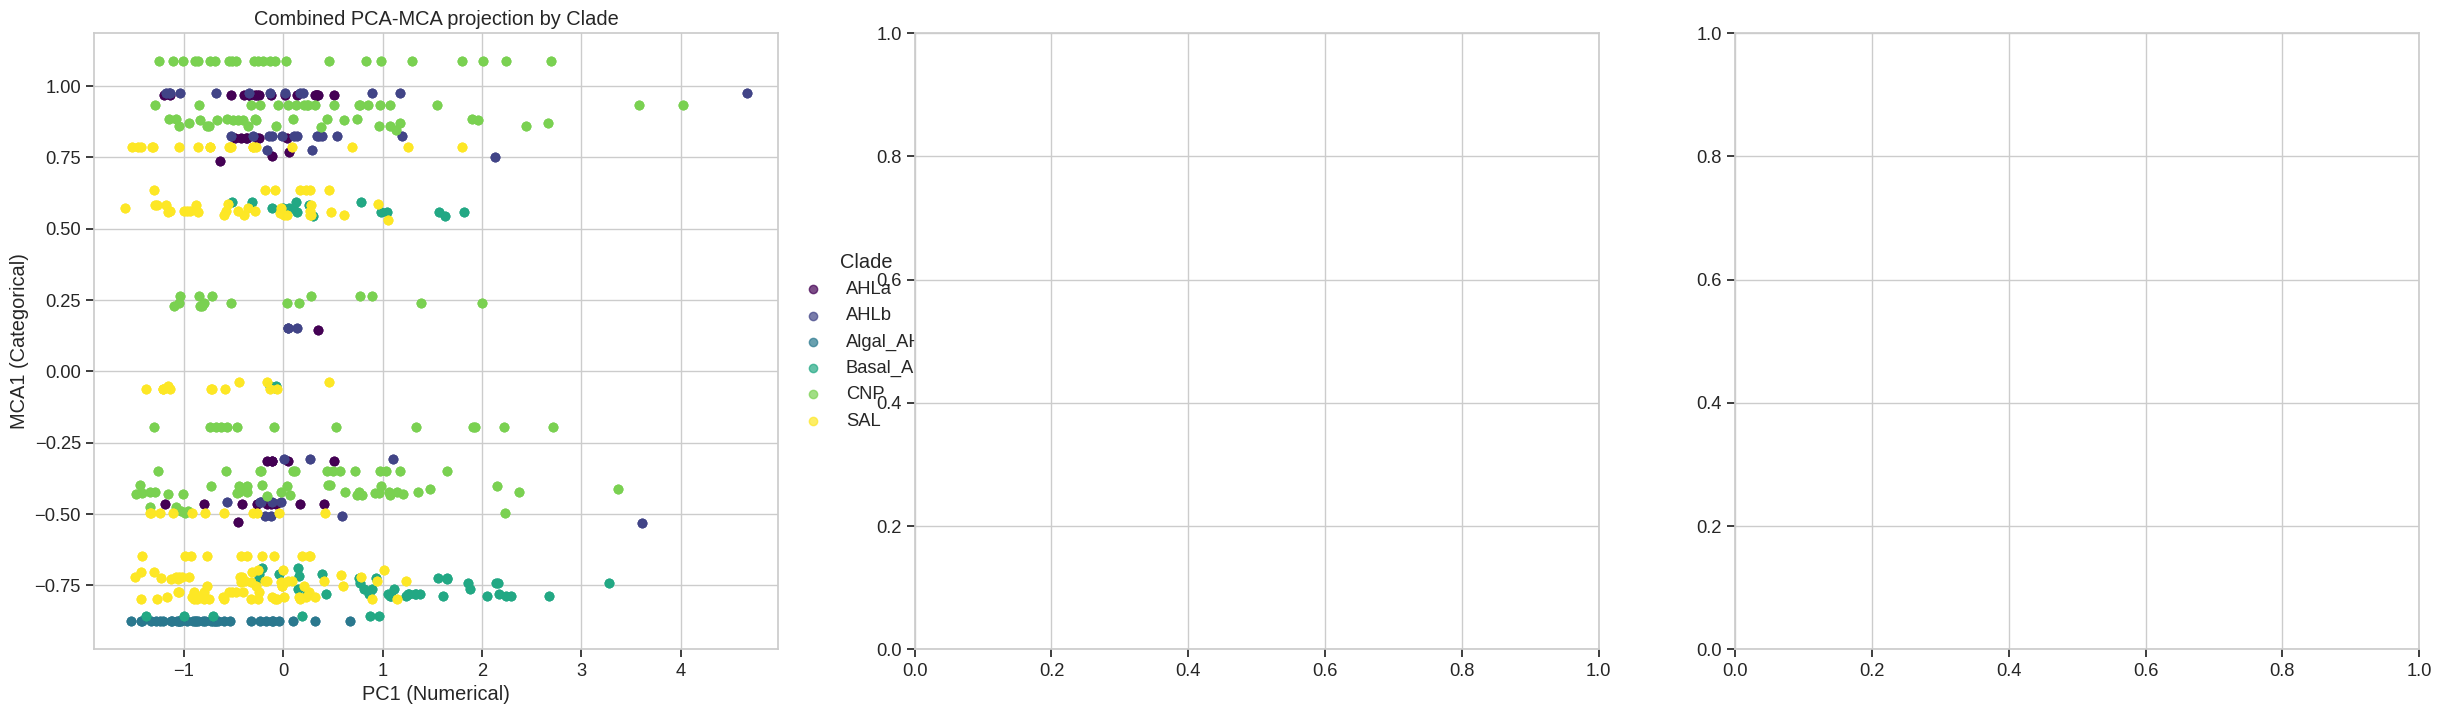

<Figure size 1000x600 with 0 Axes>

In [193]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

# Separate numerical and categorical columns
numerical_cols = ['emd_score']
categorical_cols = ['Photosynthesis_pathway', 'clade', 'taxa']

# Create a copy of the DataFrame to avoid modifying the original
df = result_temp.copy()

# Prepare numerical data
X_num = df[numerical_cols].values
scaler = StandardScaler()
X_num_scaled = scaler.fit_transform(X_num)

# Perform PCA on numerical data
pca = PCA(n_components=1)  # This is correct if you only want one component
X_num_pca = pca.fit_transform(X_num_scaled)

# Prepare categorical data
encoder = OneHotEncoder(sparse_output=False, handle_unknown='ignore')
X_cat = encoder.fit_transform(df[categorical_cols])

# Perform MCA on encoded categorical data
mca = PCA(n_components=3)
X_cat_mca = mca.fit_transform(X_cat)

# Combine PCA and MCA results
X_combined = np.hstack((X_num_pca, X_cat_mca))

# Create a new DataFrame with the results
# Fix 1: Correct column names - there should be 4 columns total
result_temp = pd.DataFrame(X_combined, columns=['PC1_num', 'MCA1', 'MCA2', 'MCA3'])

# Fix 2: Add original columns properly
result_temp = pd.concat([result_temp, df.reset_index(drop=True)], axis=1)

# Print basic information about the result_df
print("\nShape of result_temp:", result_temp.shape)
print("\nColumns in result_temp:", result_temp.columns)
print("\nSample of result_temp:")
print(result_temp.head())

# Check for NaN values in results
print("\nNaN values in result_temp:")
print(result_temp.isna().sum())

# Create a figure with three subplots
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(30, 8))

# Fix 3: Update plotting to use correct component columns
# Plot 1: Clade visualization
unique_clades = sorted(df['clade'].unique())
clade_colors = plt.cm.viridis(np.linspace(0, 1, len(unique_clades)))
color_dict = dict(zip(unique_clades, clade_colors))

for clade in unique_clades:
    mask = result_temp['clade'] == clade
    ax1.scatter(result_temp.loc[mask, 'PC1_num'], 
                result_temp.loc[mask, 'MCA1'],
                c=[color_dict[clade]], 
                label=clade, 
                alpha=0.7)

ax1.set_title('Combined PCA-MCA projection by Clade')
ax1.set_xlabel('PC1 (Numerical)')
ax1.set_ylabel('MCA1 (Categorical)')
ax1.legend(title='Clade', loc='center left', bbox_to_anchor=(1, 0.5))

# Print explained variance ratios
print("\nNumerical PCA explained variance ratio:")
print(pca.explained_variance_ratio_)
print("\nCategorical MCA explained variance ratio:")
print(mca.explained_variance_ratio_)

# Fix 6: Update variable contributions plot for PCA
plt.figure(figsize=(10, 6))
if len(pca.components_) > 1:  # Check if we have more than one component
    pca_loadings = pca.components_.T * np.sqrt(pca.explained_variance_)
    for i, col in enumerate(numerical_cols):
        plt.arrow(0, 0, pca_loadings[i, 0], pca_loadings[i, 1],
                 head_width=0.05, head_length=0.05)
        plt.text(pca_loadings[i, 0] * 1.15, pca_loadings[i, 1] * 1.15,
                col, color='red', ha='center', va='center')
    plt.xlim(-1, 1)
    plt.ylim(-1, 1)
    plt.xlabel('PC1')
    plt.ylabel('PC2')
    plt.title('PCA Variable Contributions')
    plt.grid(True)
    plt.tight_layout()
    plt.show()
else:
    print("\nVariable contributions plot skipped - only one PCA component calculated")

In [187]:
result_temp

,PC1_num,MCA1,MCA2,MCA3,PC1_num,MCA1,MCA2,MCA3,PC1_num,MCA1,...,seq_id,target_pH,emd_score,clade,Species,taxa,classification,Photosynthesis_pathway,localisation,accuracy
0,-0.987018,-0.497053,-0.743602,0.303035,-0.987018,-0.497053,-0.743602,0.303029,-0.987018,-0.497053,...,10029,7_9,0.001930,CNP,Marchantia paleacea,Liverworts,Liverworts,NaN,Cytoplasm,Partial
1,-0.120056,-0.507309,-0.159591,-0.262394,-0.120056,-0.507309,-0.159591,-0.262390,-0.120056,-0.507309,...,10086,8_2,0.003430,AHLb,Hilleria latifolia,Eudicots/Caryophyllales,Eudicots/Caryophyllales,NaN,Cytoplasm|Nucleus,Yes
2,-0.716137,0.263027,-0.700526,0.709257,-0.716137,0.263027,-0.700526,0.709256,-0.716137,0.263027,...,10276,8_2,0.002398,CNP,Amaranthus hypochondriacus,Eudicots/Caryophyllales,Eudicots/Caryophyllales,C4,Plastid,Yes
3,0.202926,0.977027,0.240723,-0.717382,0.202926,0.977027,0.240723,-0.717383,0.202926,0.977027,...,10748,8_2,0.003989,AHLb,Glycine max,Eudicots/Rosids,Eudicots/Rosids,C3,Plastid,Yes
4,1.037304,-0.347962,-0.882629,0.266566,1.037304,-0.347962,-0.882629,0.266565,1.037304,-0.347962,...,10972,7_9,0.005432,CNP,Plantago virginica,Eudicots/Asterids,Eudicots/Asterids,NaN,Plastid|Mitochondria,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
500,-0.521091,0.970320,0.243373,-0.766327,-0.521091,0.970320,0.243373,-0.766327,-0.521091,0.970320,...,AtAHL,7_6,0.002736,AHLa,Arabidopsis thaliana,Eudicots/Rosids,Eudicots/Rosids,C3,Cytoplasm|Nucleus,Yes
501,-0.307890,0.787065,0.932426,-0.086883,-0.307890,0.787065,0.932426,-0.086883,-0.307890,0.787065,...,AtSAL1,8_2,0.003105,SAL,Arabidopsis thaliana,Eudicots/Rosids,Eudicots/Rosids,C3,Plastid|Mitochondria,Yes
502,-0.739508,0.787065,0.932426,-0.086883,-0.739508,0.787065,0.932426,-0.086883,-0.739508,0.787065,...,AtSAL2,7_9,0.002358,SAL,Arabidopsis thaliana,Eudicots/Rosids,Eudicots/Rosids,C3,Cytoplasm|Nucleus,No
503,-0.304718,0.787065,0.932426,-0.086883,-0.304718,0.787065,0.932426,-0.086883,-0.304718,0.787065,...,AtSAL3,8_2,0.003110,SAL,Arabidopsis thaliana,Eudicots/Rosids,Eudicots/Rosids,C3,Cytoplasm|Nucleus,No


In [151]:
# # Separate numerical and categorical columns
# numerical_cols = ['SAL_emd_score', 'HAL_emd_score']
# categorical_cols = ['SAL_pH', 'HAL_pH', 'clade']

# # Create a copy of the DataFrame to avoid modifying the original
# df = combined_result.copy()

# # Prepare numerical data
# X_num = df[numerical_cols].values
# scaler = StandardScaler()
# X_num_scaled = scaler.fit_transform(X_num)

# # Perform PCA on numerical data
# pca = PCA(n_components=2)
# X_num_pca = pca.fit_transform(X_num_scaled)

# result_df = pd.DataFrame(X_num_pca, columns=['PC1', 'PC2'])
# result_df = pd.concat([result_df, df], axis=1)

# # Print basic information about the result_df
# print("\nShape of result_df:", result_df.shape)
# print("\nColumns in result_df:", result_df.columns)
# print("\nSample of result_df:")
# print(result_df.head())

# # Check for NaN values in results
# print("\nNaN values in result_df:")
# print(result_df.isna().sum())

# # Create a figure with three subplots
# fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(30, 8))

# # Plot 1: Clade visualization
# unique_clades = sorted(df['clade'].unique())
# clade_colors = plt.cm.viridis(np.linspace(0, 1, len(unique_clades)))
# color_dict = dict(zip(unique_clades, clade_colors))

# for clade in unique_clades:
#     mask = result_df['clade'] == clade
#     ax1.scatter(result_df.loc[mask, 'PC1'], 
#                 result_df.loc[mask, 'PC2'],                
#                 c=[color_dict[clade]], label=clade, alpha=0.7)

# ax1.set_title('PCA projection by Clade')
# ax1.set_xlabel('PC1')
# ax1.set_ylabel('PC2')
# ax1.legend(title='Clade', loc='center left', bbox_to_anchor=(1, 0.5))

# # Plot 2: SAL_pH visualization
# for ph in sorted(df['SAL_pH'].unique()):
#     mask = result_df['SAL_pH'] == ph
#     ax2.scatter(result_df.loc[mask, 'PC1'], 
#                 result_df.loc[mask, 'PC2'],
#                 label=f'SAL_pH {ph}', alpha=0.7)

# ax2.set_title('PCA projection by SAL_pH')
# ax2.set_xlabel('PC1')
# ax2.set_ylabel('PC2')
# ax2.legend(title='SAL_pH', loc='center left', bbox_to_anchor=(1, 0.5))

# # Plot 3: HAL_pH visualization
# for ph in sorted(df['HAL_pH'].unique()):
#     mask = result_df['HAL_pH'] == ph
#     ax3.scatter(result_df.loc[mask, 'PC1'], 
#                 result_df.loc[mask, 'PC2'],
#                 label=f'HAL_pH {ph}', alpha=0.7)

# ax3.set_title('PCA projection by HAL_pH')
# ax3.set_xlabel('PC1')
# ax3.set_ylabel('PC2')
# ax3.legend(title='HAL_pH', loc='center left', bbox_to_anchor=(1, 0.5))

# # Adjust layout and display
# plt.tight_layout()
# plt.show()

# # Print explained variance ratios
# print("\nPCA explained variance ratio:")
# print(pca.explained_variance_ratio_)

# # Plot variable contributions for PCA
# plt.figure(figsize=(10, 6))
# pca_loadings = pca.components_.T * np.sqrt(pca.explained_variance_)
# for i, col in enumerate(numerical_cols):
#     plt.arrow(0, 0, pca_loadings[i, 0], pca_loadings[i, 1], head_width=0.05, head_length=0.05)
#     plt.text(pca_loadings[i, 0] * 1.15, pca_loadings[i, 1] * 1.15, col, color='red', ha='center', va='center')
# plt.xlim(-1, 1)
# plt.ylim(-1, 1)
# plt.xlabel('PC1')
# plt.ylabel('PC2')
# plt.title('PCA Variable Contributions')
# plt.grid(True)
# plt.tight_layout()
# plt.show()